# **Installing Proper Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,auc
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
!pip install xgboost
import xgboost as xgb




In [2]:
!pip install catboost
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


# **File Reading**

In [32]:
df=pd.read_csv("/content/sample_data/bank-additional-full.csv",sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **Statistical Features of Dataset**

**Homogenity Check**

In [ ]:

from scipy.stats import levene

results = {}
num_cols=df.select_dtypes(["int64","float64"])

for feature in num_cols.columns:
    group_A = df[df['y'] == 'no'][feature]
    group_B = df[df['y'] == 'yes'][feature]

    stat, p = levene(group_A, group_B)
    results[feature] = {'Test Statistics': stat, 'P-Value': p}


print("Levene Test Results:")
for feature, result in results.items():
    print(f"{feature}: Test Statistics = {result['Test Statistics']:.4f}, P-Value = {result['P-Value']:.4f}")
    if result['P-Value'] > 0.05:
        print(f"    --> {feature}: Variances are homogeneous (H0 can't be refused).")
    else:
        print(f"    --> {feature}: Variances are not homogeneous (H0 can be refused).")


Levene Test Results:
age: Test Statistics = 689.3228, P-Value = 0.0000
    --> age: Variances are not homogeneous (H0 can be refused).
duration: Test Statistics = 3129.9617, P-Value = 0.0000
    --> duration: Variances are not homogeneous (H0 can be refused).
campaign: Test Statistics = 127.7071, P-Value = 0.0000
    --> campaign: Variances are not homogeneous (H0 can be refused).
pdays: Test Statistics = 4861.1733, P-Value = 0.0000
    --> pdays: Variances are not homogeneous (H0 can be refused).
previous: Test Statistics = 2304.2571, P-Value = 0.0000
    --> previous: Variances are not homogeneous (H0 can be refused).
emp.var.rate: Test Statistics = 26.1551, P-Value = 0.0000
    --> emp.var.rate: Variances are not homogeneous (H0 can be refused).
cons.price.idx: Test Statistics = 237.4224, P-Value = 0.0000
    --> cons.price.idx: Variances are not homogeneous (H0 can be refused).
cons.conf.idx: Test Statistics = 1048.4714, P-Value = 0.0000
    --> cons.conf.idx: Variances are not hom

It is not homogeneous

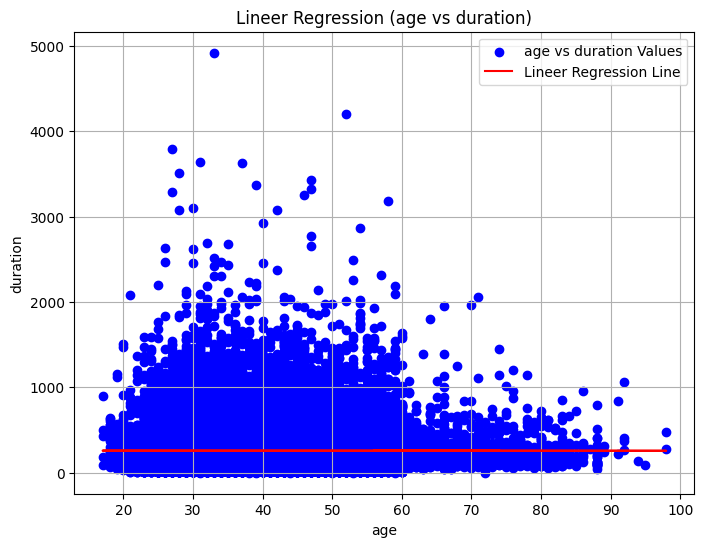

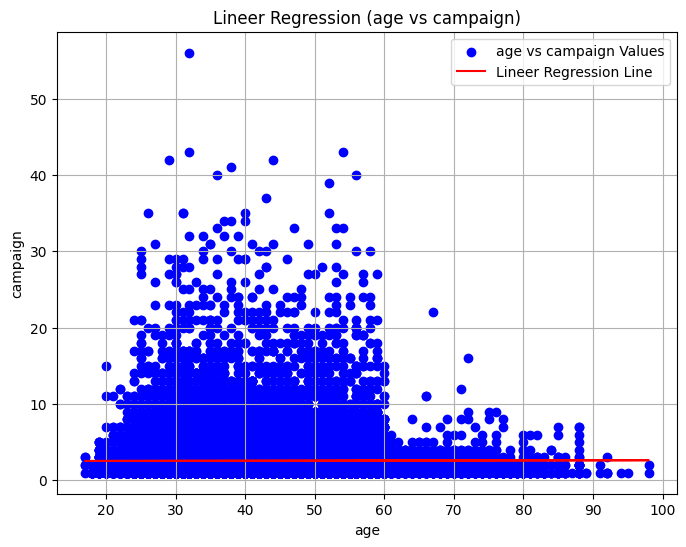

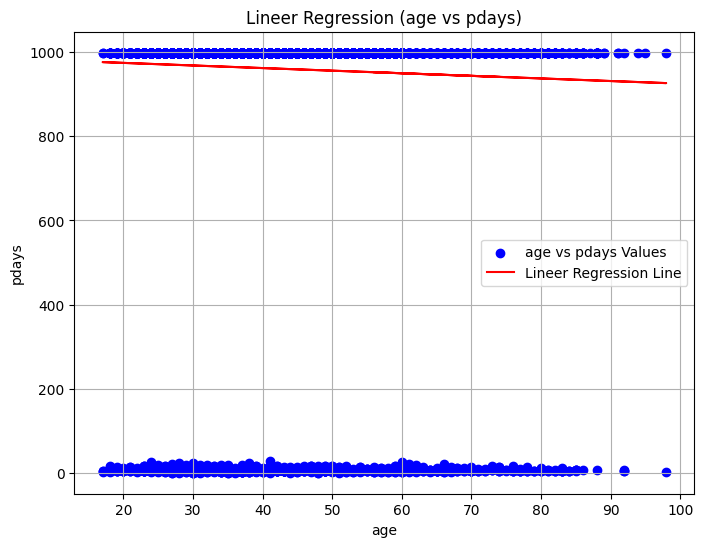

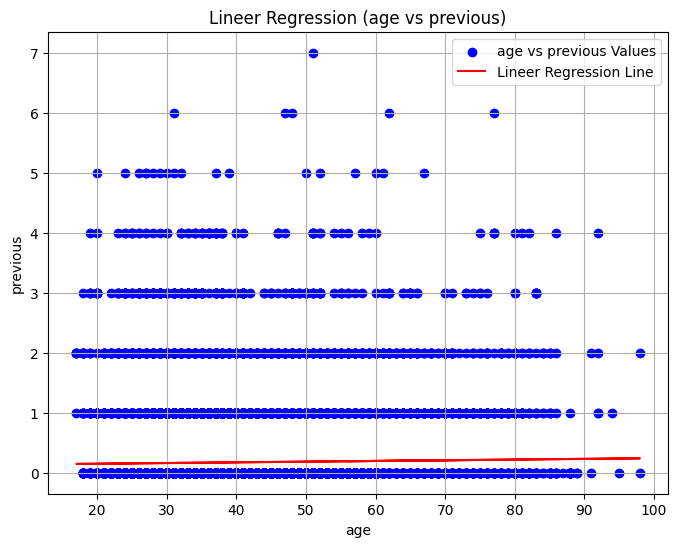

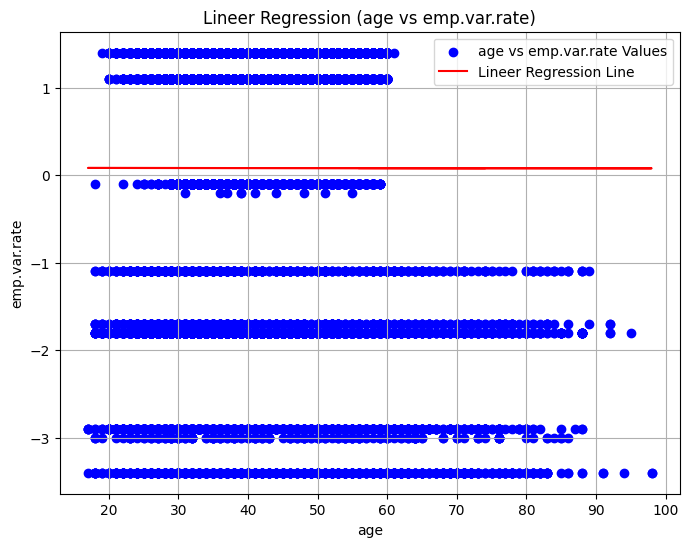

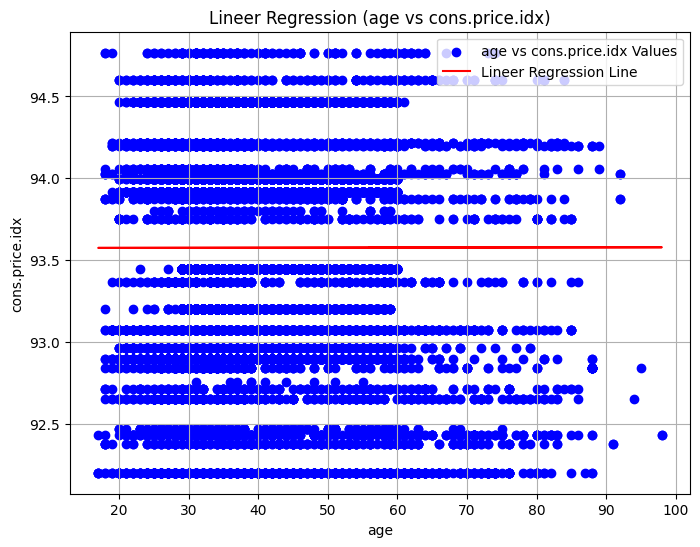

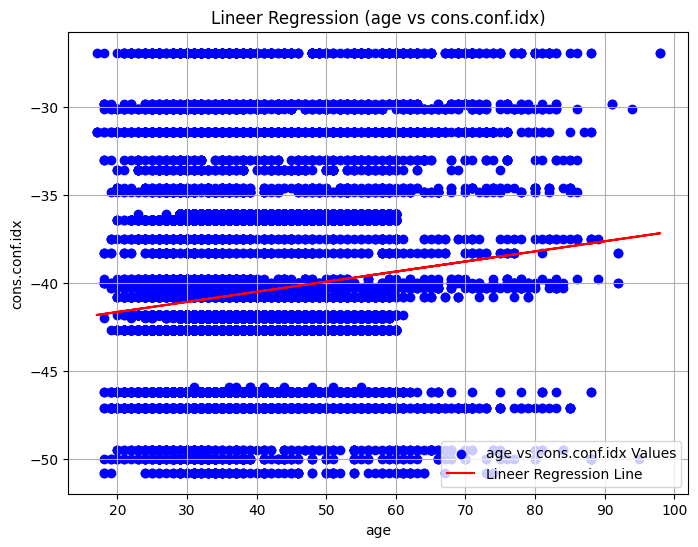

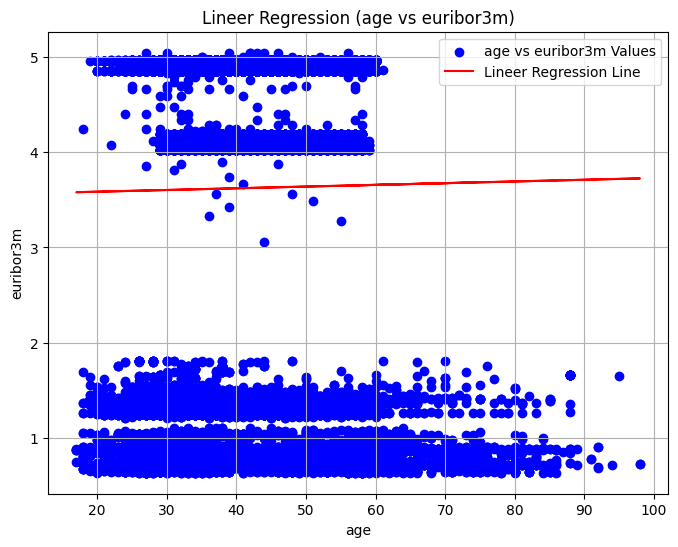

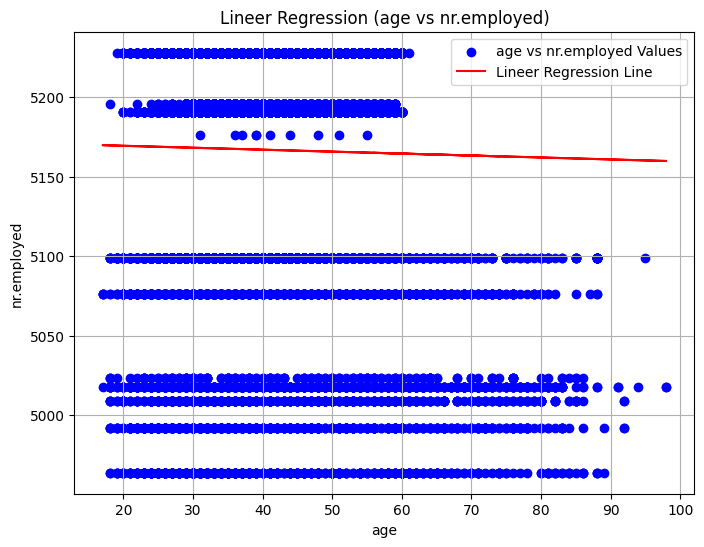

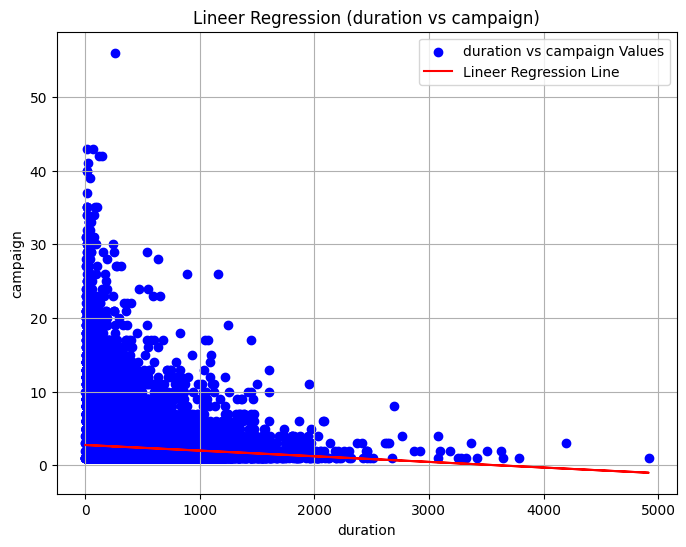

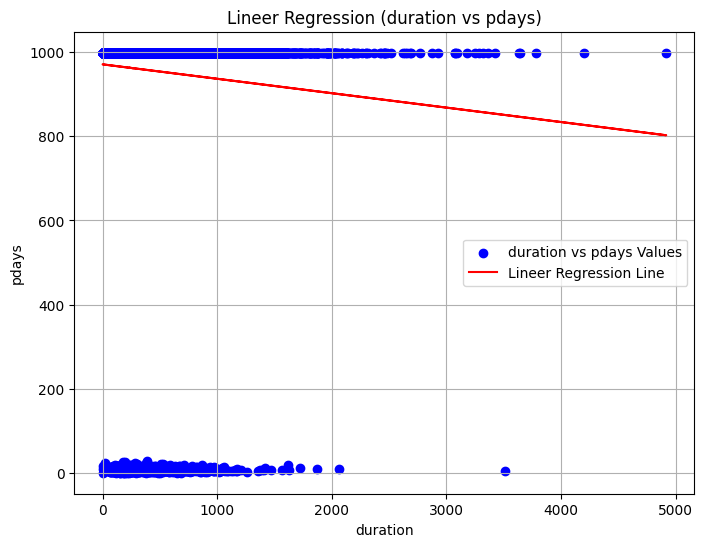

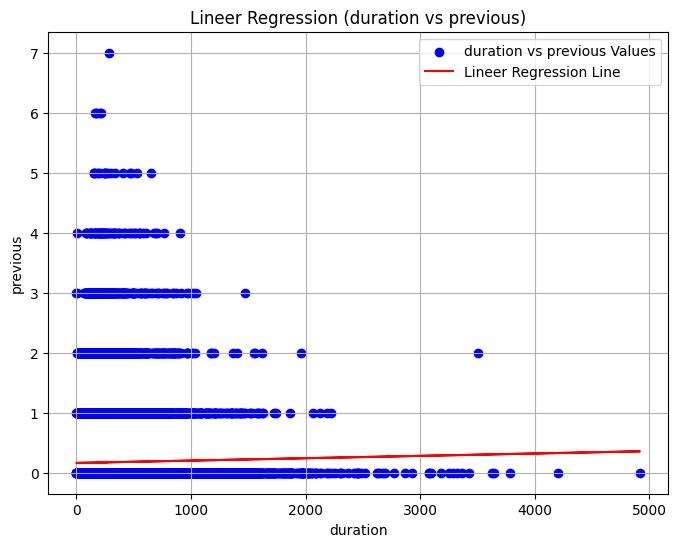

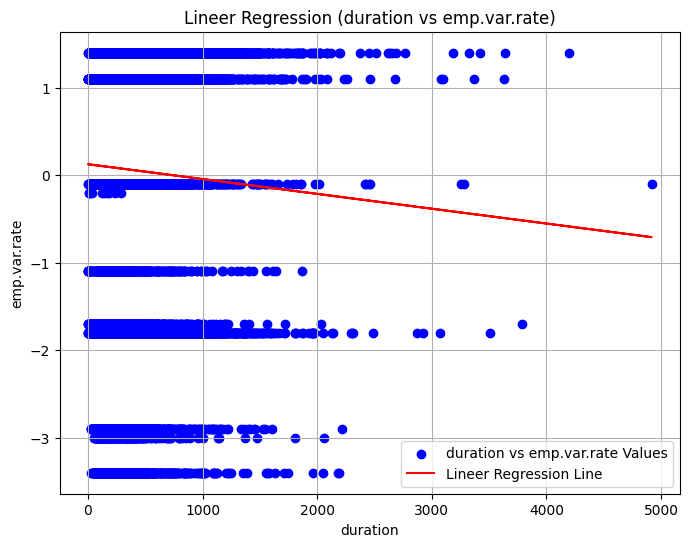

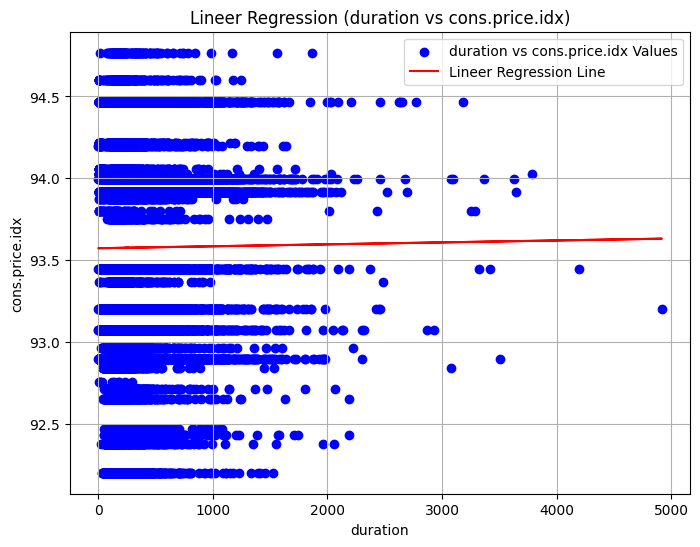

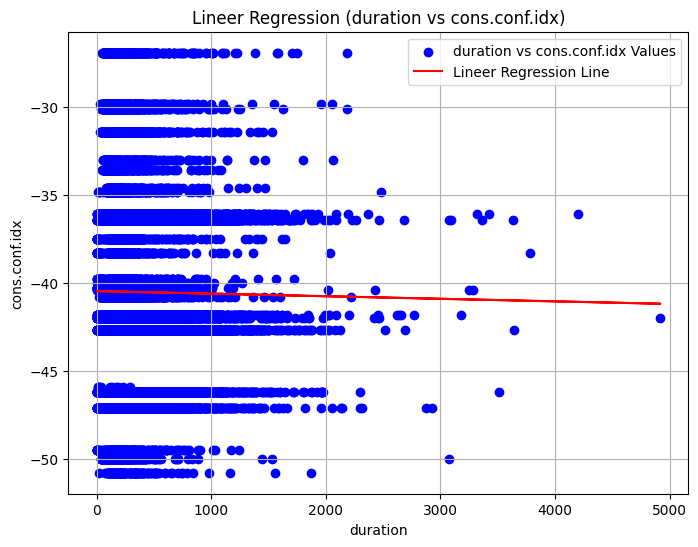

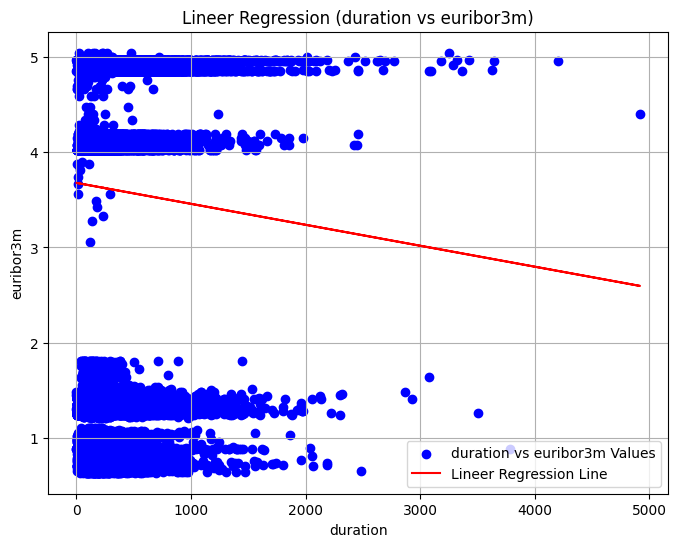

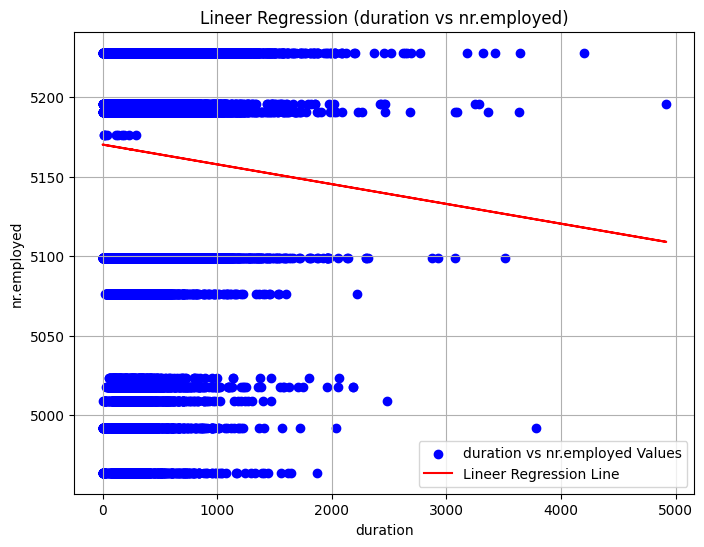

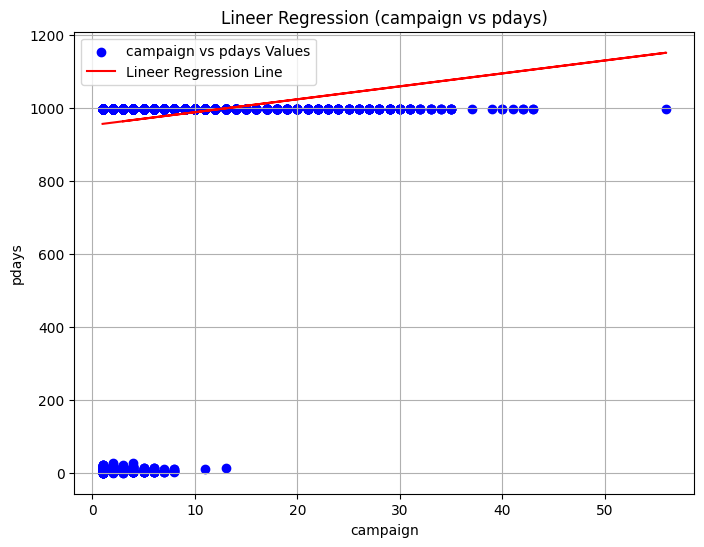

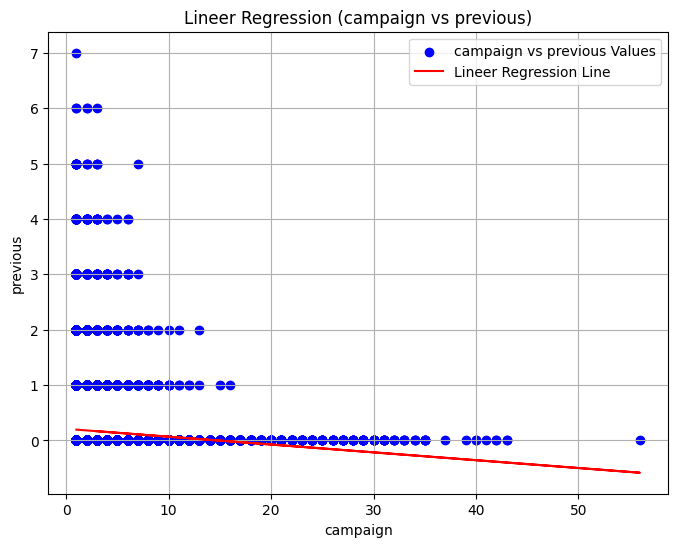

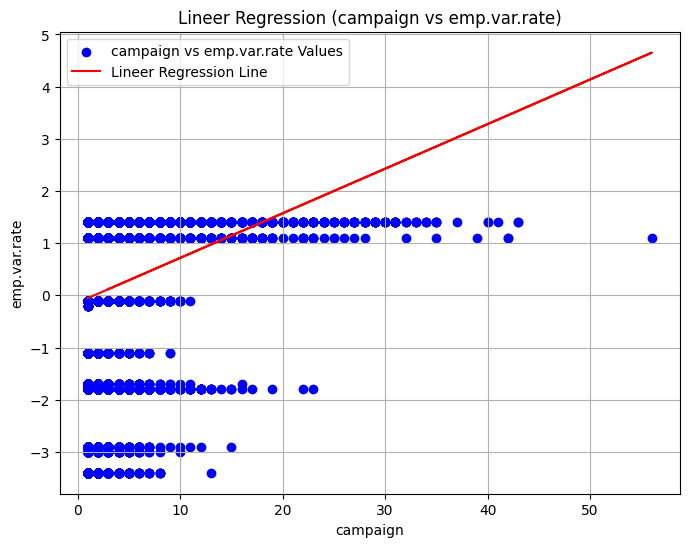

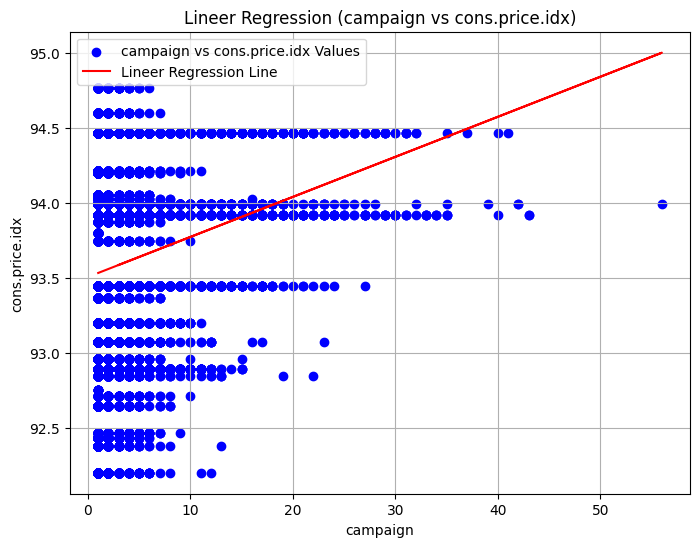

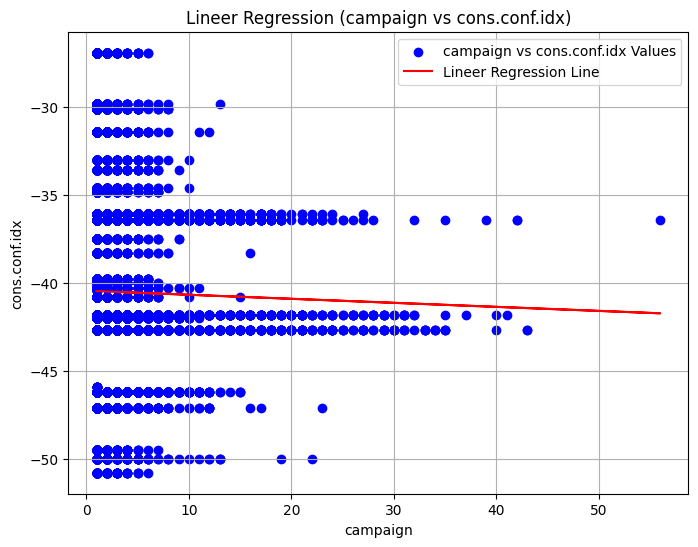

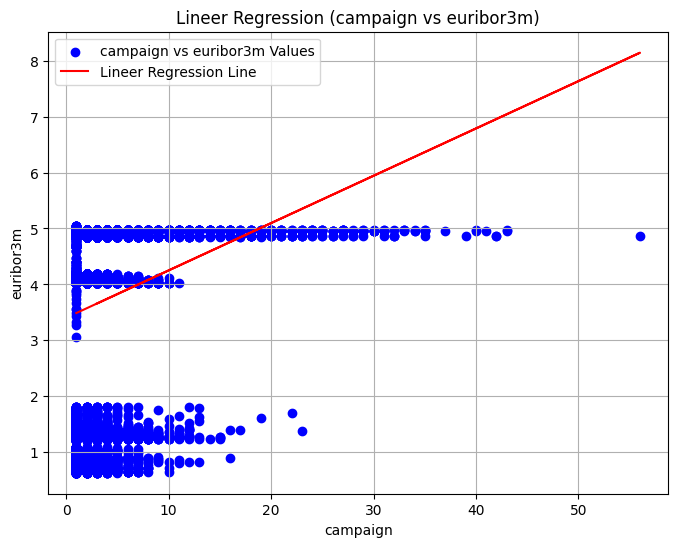

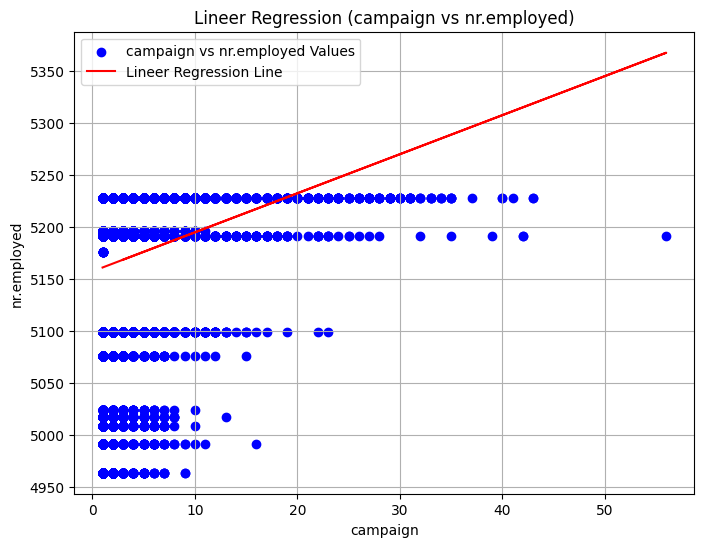

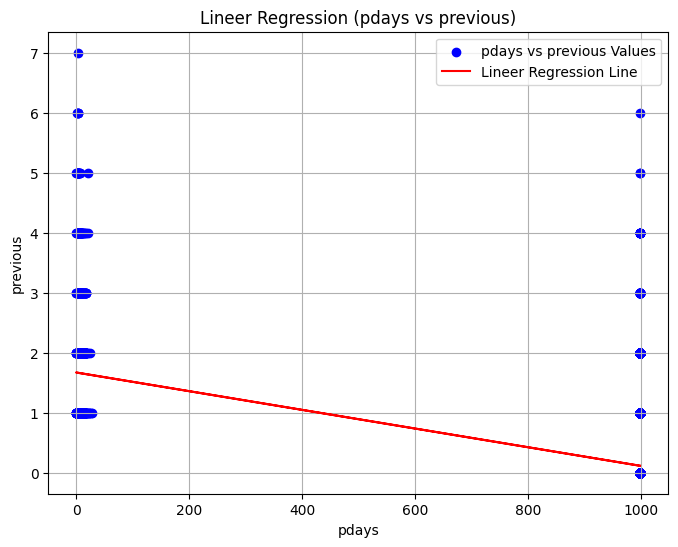

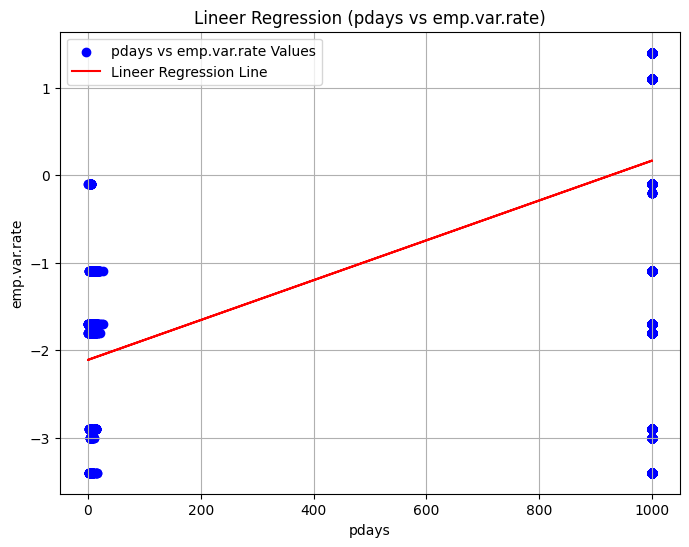

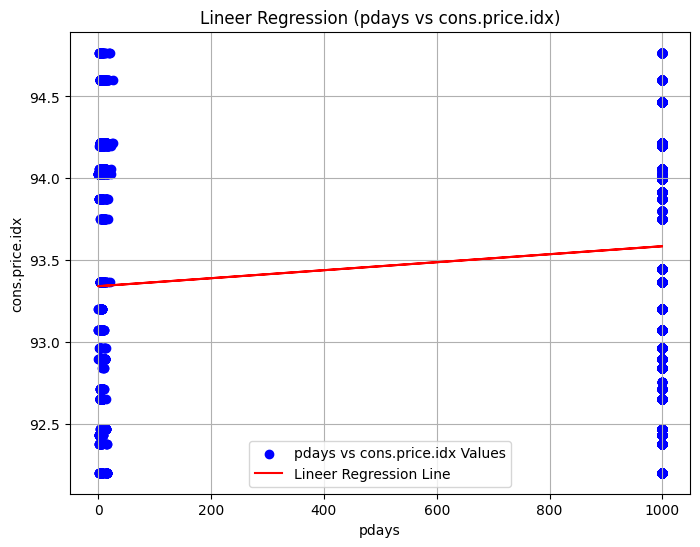

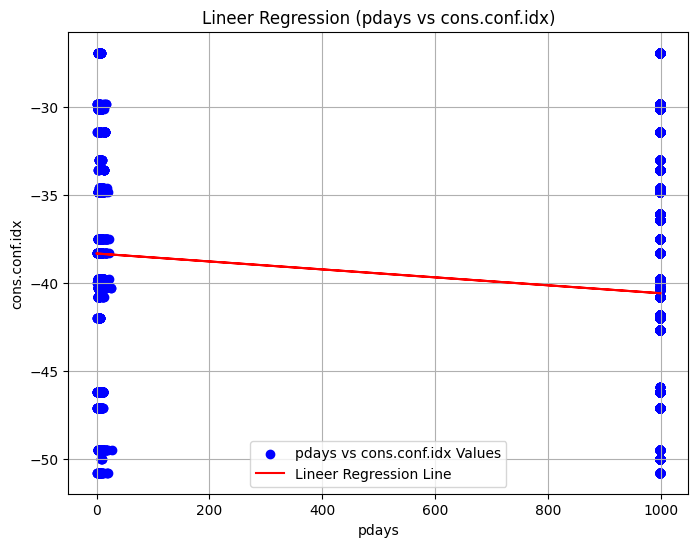

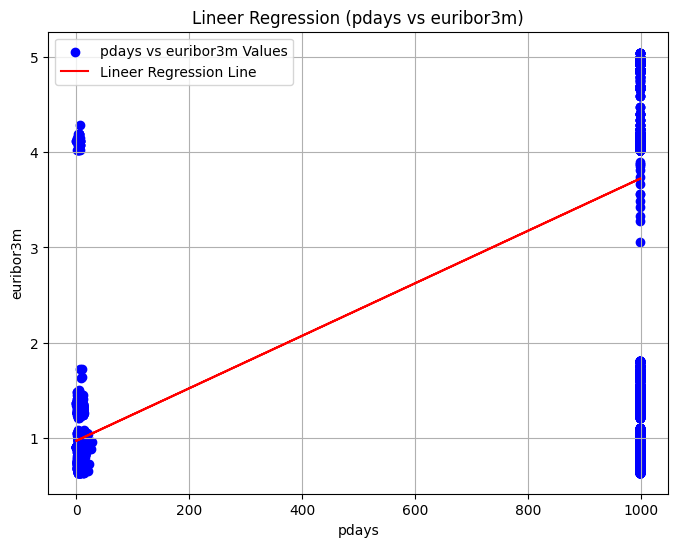

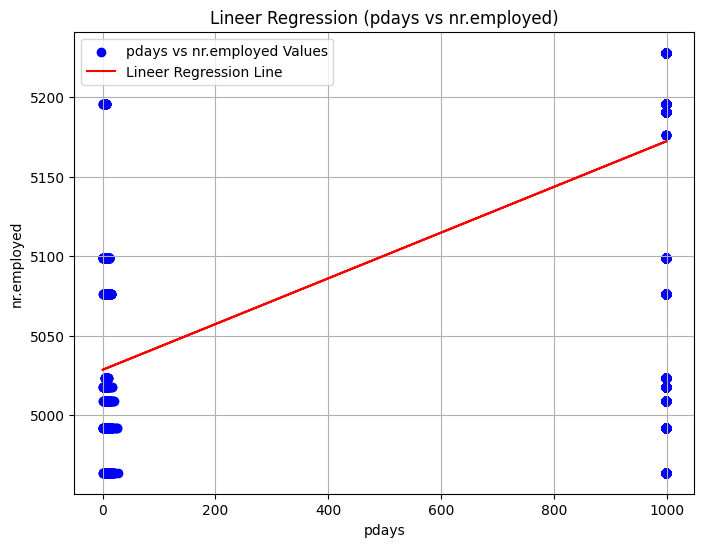

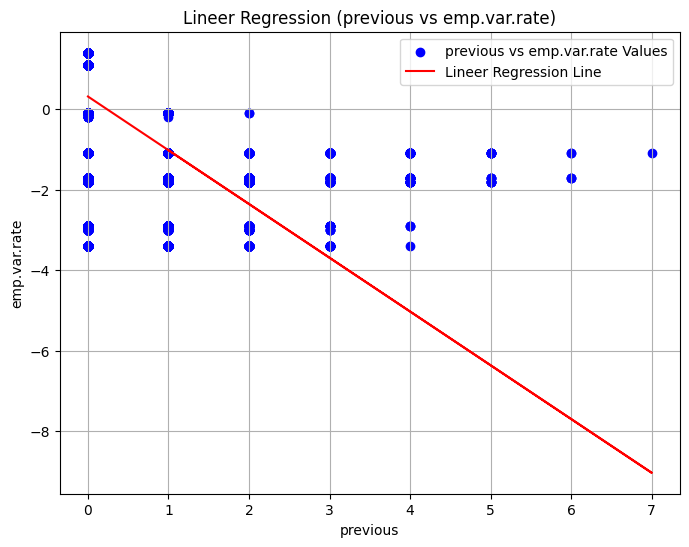

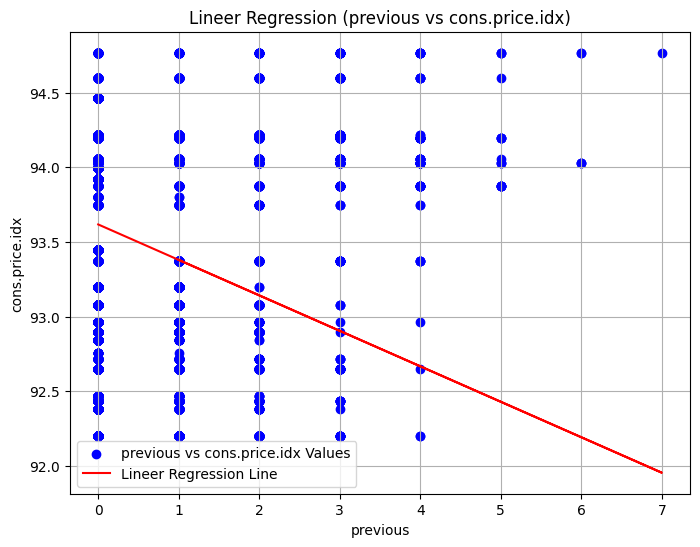

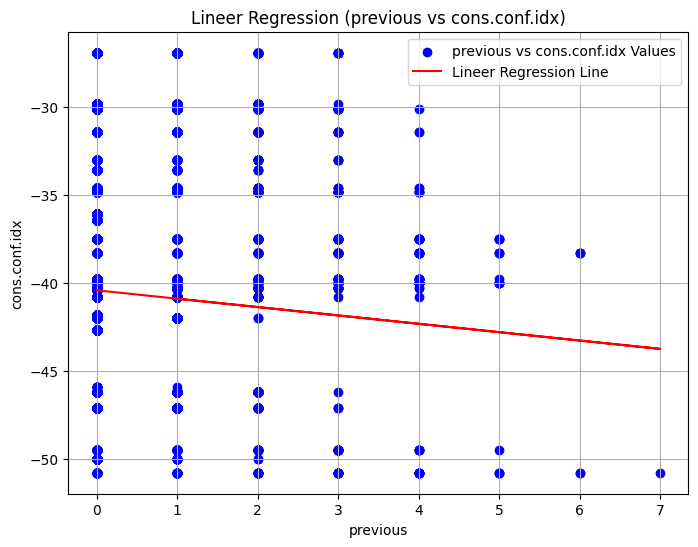

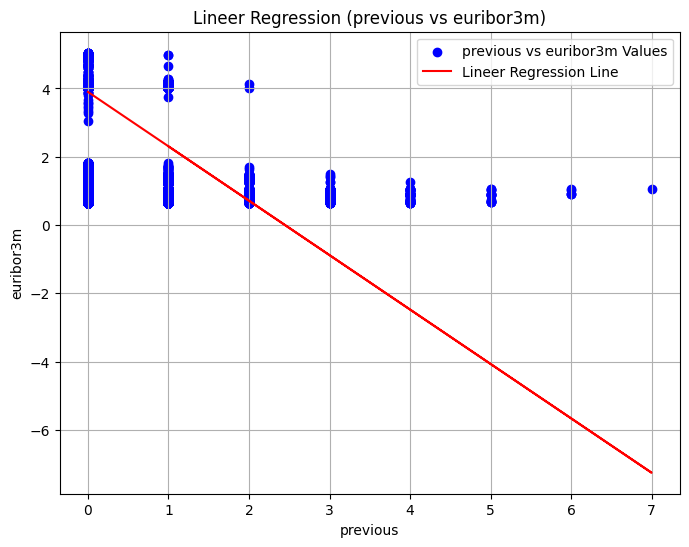

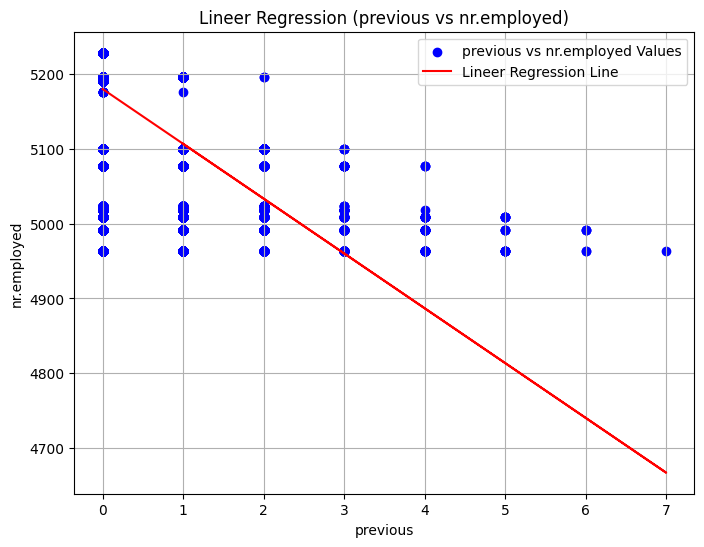

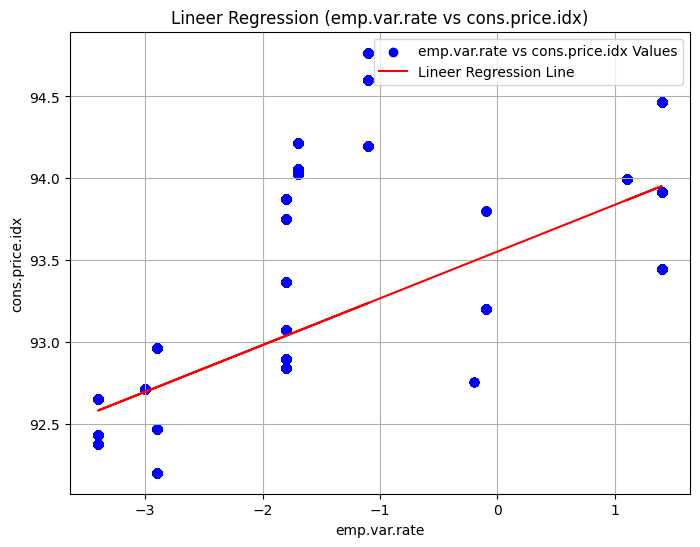

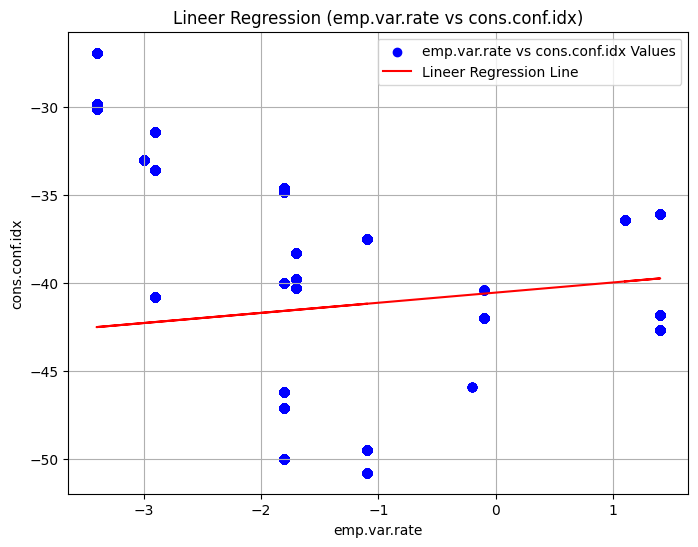

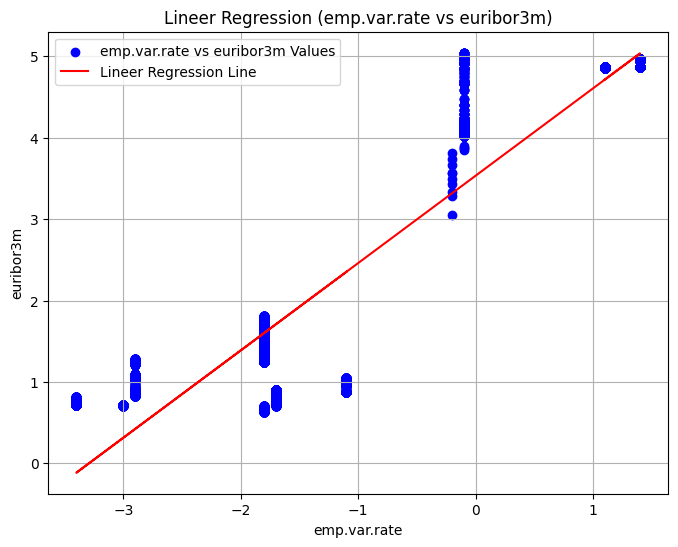

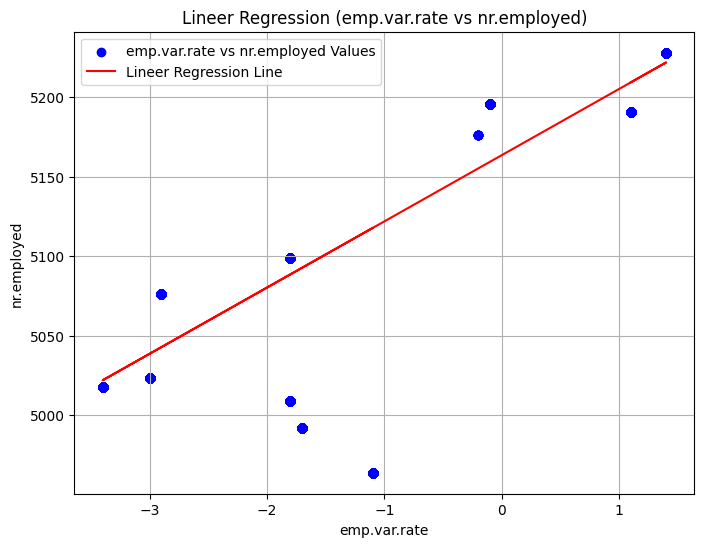

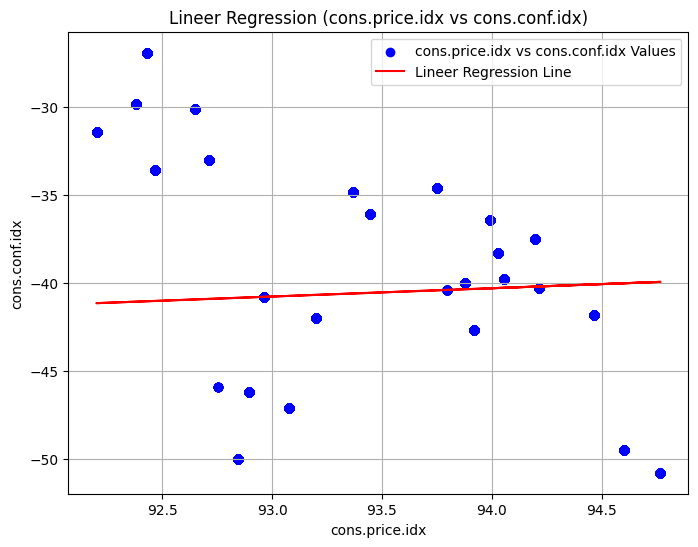

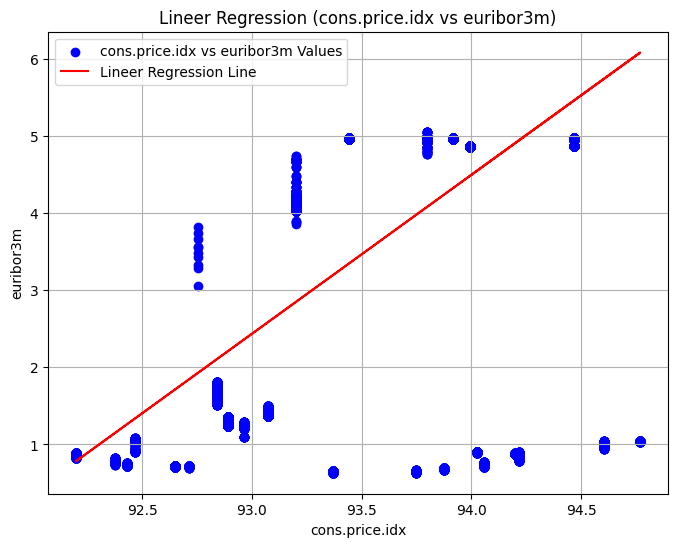

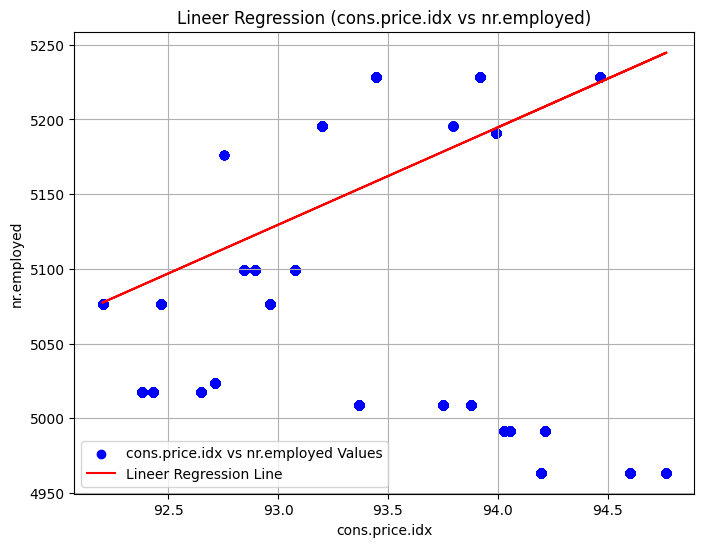

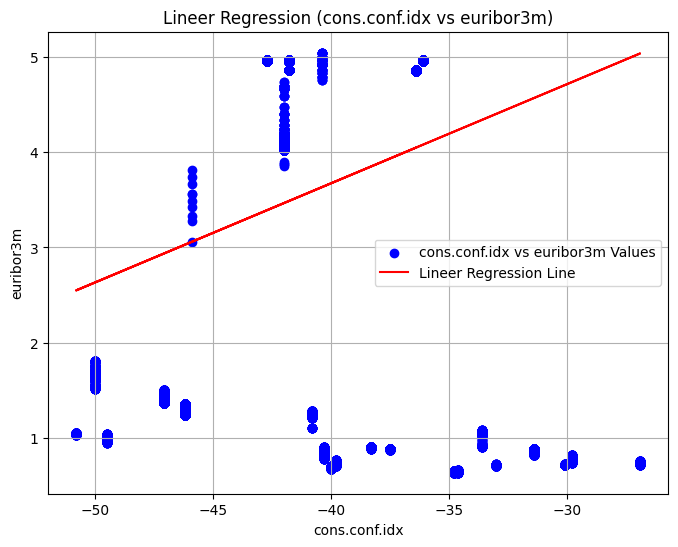

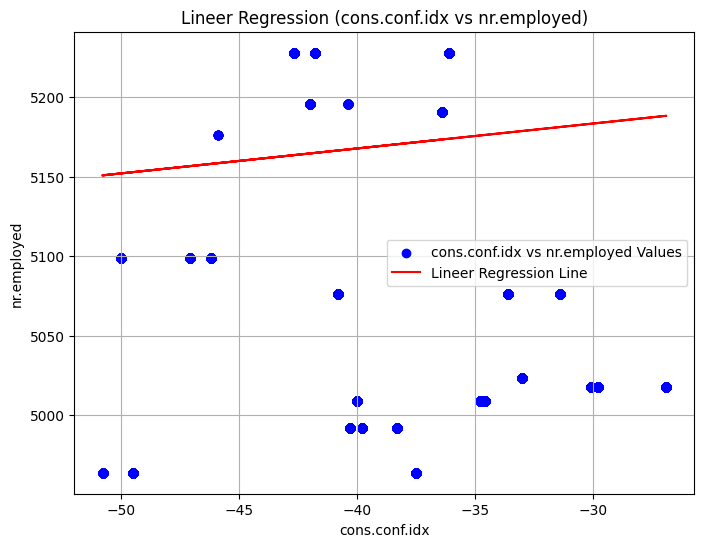

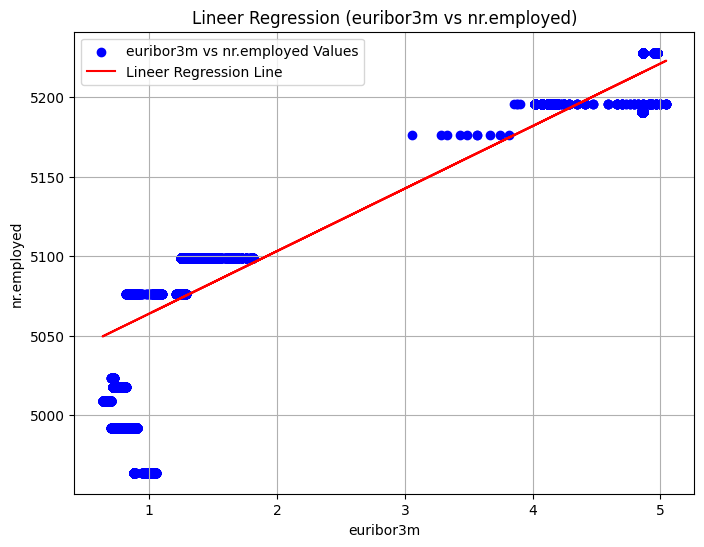

Pearson Correlation Results (R² Score):
('age', 'duration'): R² = 0.0000
('age', 'campaign'): R² = 0.0000
('age', 'pdays'): R² = 0.0012
('age', 'previous'): R² = 0.0006
('age', 'emp.var.rate'): R² = 0.0000
('age', 'cons.price.idx'): R² = 0.0000
('age', 'cons.conf.idx'): R² = 0.0167
('age', 'euribor3m'): R² = 0.0001
('age', 'nr.employed'): R² = 0.0003
('duration', 'campaign'): R² = 0.0051
('duration', 'pdays'): R² = 0.0023
('duration', 'previous'): R² = 0.0004
('duration', 'emp.var.rate'): R² = 0.0008
('duration', 'cons.price.idx'): R² = 0.0000
('duration', 'cons.conf.idx'): R² = 0.0001
('duration', 'euribor3m'): R² = 0.0011
('duration', 'nr.employed'): R² = 0.0020
('campaign', 'pdays'): R² = 0.0028
('campaign', 'previous'): R² = 0.0063
('campaign', 'emp.var.rate'): R² = 0.0227
('campaign', 'cons.price.idx'): R² = 0.0163
('campaign', 'cons.conf.idx'): R² = 0.0002
('campaign', 'euribor3m'): R² = 0.0183
('campaign', 'nr.employed'): R² = 0.0208
('pdays', 'previous'): R² = 0.3452
('pdays', 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from itertools import combinations

feature_combinations = list(combinations(num_cols, 2))
results = {}


for col1,col2 in feature_combinations:

  if col1 != col2:

    X = num_cols[col1].values.reshape(-1, 1)
    y = num_cols[col2].values


    model = LinearRegression()
    model.fit(X, y)


    y_pred = model.predict(X)


    r2 = r2_score(y, y_pred)
    results[(col1, col2)] = r2


    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label=f'{col1} vs {col2} Values')
    plt.plot(X, y_pred, color='red', label='Lineer Regression Line')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.title(f'Lineer Regression ({col1} vs {col2})')
    plt.legend()
    plt.grid(True)
    plt.show()

print("Pearson Correlation Results (R² Score):")
for pair, r2_value in results.items():
    print(f"{pair}: R² = {r2_value:.4f}")

Although some features have linear relationship,still dataset has mostly non-linear features

# **Target-Other features Relationships**

**For Numerical Values**

In [ ]:
from scipy.stats import spearmanr, chi2_contingency


numeric_features = num_cols

for feature in numeric_features:
    spearman_corr, _ = spearmanr(df[feature], df['y'])
    print(f"{feature} and Target Spearman Correlation: {spearman_corr:.4f}")


age and Target Spearman Correlation: -0.0119
duration and Target Spearman Correlation: 0.3488
campaign and Target Spearman Correlation: -0.0637
pdays and Target Spearman Correlation: -0.3249
previous and Target Spearman Correlation: 0.2009
emp.var.rate and Target Spearman Correlation: -0.2475
cons.price.idx and Target Spearman Correlation: -0.1222
cons.conf.idx and Target Spearman Correlation: 0.0412
euribor3m and Target Spearman Correlation: -0.2668
nr.employed and Target Spearman Correlation: -0.2840


 **Categorical Values**

In [ ]:
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

categorical_features = df.select_dtypes(include=['object', 'category']).columns
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['y'])
    cramers_v_value = cramers_v(contingency_table)
    print(f"{feature} and Target Cramér's V Value: {cramers_v_value:.4f}")

job and Target Cramér's V Value: 0.1528
marital and Target Cramér's V Value: 0.0546
education and Target Cramér's V Value: 0.0685
default and Target Cramér's V Value: 0.0994
housing and Target Cramér's V Value: 0.0117
loan and Target Cramér's V Value: 0.0052
contact and Target Cramér's V Value: 0.1447
month and Target Cramér's V Value: 0.2744
day_of_week and Target Cramér's V Value: 0.0252
poutcome and Target Cramér's V Value: 0.3205
y and Target Cramér's V Value: 0.9999


In [ ]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder


categorical_features = df.select_dtypes(include=['object', 'category']).columns
encoder = LabelEncoder()

for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

X = df.drop('y', axis=1)
y = df['y']

mi_classif = mutual_info_classif(X, y)
mi_classif_df = pd.DataFrame(mi_classif, index=X.columns, columns=['Mutual Information'])
print("Mutual Information Scores:")
print(mi_classif_df)

Mutual Information Scores:
                Mutual Information
age                       0.011554
job                       0.011087
marital                   0.004318
education                 0.003504
default                   0.006359
housing                   0.003793
loan                      0.000000
contact                   0.014259
month                     0.028294
day_of_week               0.000837
duration                  0.075317
campaign                  0.005333
pdays                     0.039912
previous                  0.019533
poutcome                  0.039892
emp.var.rate              0.053581
cons.price.idx            0.069432
cons.conf.idx             0.067627
euribor3m                 0.073486
nr.employed               0.064490


# **Some Informations About Variables in Dataset**

In [ ]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
print(df.size)
print(df.shape)
print(df.ndim)

864948
(41188, 21)
2


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


# **Duplicated Variable Detection and Dropping**

In [ ]:
df.duplicated().sum()

12

In [33]:
df.drop_duplicates(inplace=True)

# **Unique Variables**

In [ ]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

# **Outlier Detection**

In [ ]:
def OTH(df,col_name, low_quantile=0.25,up_quantile=0.75):
    Q1=df[col_name].quantile(low_quantile)
    Q3=df[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    print(col_name,low_limit,up_limit)
    return low_limit,up_limit


In [ ]:
def detection(dataframe,col_name):
    low_limit,up_limit=OTH(dataframe,col_name)
    if dataframe[(dataframe[col_name]>up_limit)| (dataframe[col_name]<low_limit)].any(axis=None):
                                                  return True
    else:
                                                  return False

In [ ]:
for col in list(num_cols.columns):
    print(col,detection(df,col))


age 9.5 69.5
age True
duration -223.5 644.5
duration True
campaign -2.0 6.0
campaign True
pdays 999.0 999.0
pdays True
previous 0.0 0.0
previous True
emp.var.rate -6.6000000000000005 6.200000000000001
emp.var.rate False
cons.price.idx 91.69650000000001 95.3725
cons.price.idx False
cons.conf.idx -52.150000000000006 -26.949999999999992
cons.conf.idx True
euribor3m -4.081499999999999 10.3865
euribor3m False
nr.employed 4905.6 5421.6
nr.employed False


After the up and low limit values were taken from IQR, they were checked.

In [ ]:
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


# **Age**

**Outliers**

In [ ]:
(df['age'].between(69.5,df.age.max()+1)).value_counts()

,count
age,
False,40708
True,468


In [ ]:
468/(468+40708)

0.011365844181076355

In [ ]:
((df['age'].between(69.5,df.age.max()+1)) & (df['y'] == 'yes')).value_counts()

,count
False,40955
True,221


In [ ]:
((df['age'].between(69.5,df.age.max()+1)) & (df['y'] == 'no')).value_counts()

,count
False,40929
True,247


In [ ]:
221/(247+221)

0.4722222222222222

 **Not Outlier Values**

In [ ]:
(df['age'].between(df.age.min(),69.5) & (df['y'] == 'yes')).value_counts()

,count
False,36758
True,4418


In [ ]:
(df['age'].between(df.age.min(),69.5) & (df['y'] == 'no')).value_counts()

,count
True,36290
False,4886


In [ ]:
4418/(4418+36290)

0.10852903606170777

# **Duration**

**Outliers**

In [ ]:
(df['duration'].between(644.5,df.duration.max()+1)).value_counts()

,count
duration,
False,38213
True,2963


In [ ]:
2963/(2963+38213)

0.07195939382164368

In [ ]:
((df['duration'].between(644.5,df.duration.max()+1)) & (df['y'] == 'yes')).value_counts()

,count
False,39650
True,1526


In [ ]:
((df['duration'].between(644.5,df.duration.max()+1)) & (df['y'] == 'no')).value_counts()

,count
False,39739
True,1437


In [ ]:
1526/(1437+1526)

0.5150185622679716

**Not Outlier Values**

In [ ]:
(df['duration'].between(df.duration.min(),644.5)).value_counts()

,count
duration,
True,38213
False,2963


In [ ]:
((df['duration'].between(df.duration.min(),644.5)) & (df['y'] == 'yes')).value_counts()

,count
False,38063
True,3113


In [ ]:
((df['duration'].between(df.duration.min(),644.5)) & (df['y'] == 'no')).value_counts()

,count
True,35100
False,6076


In [ ]:
3113/(3113+35100)

0.08146442310208568

# **Campaign**

In [ ]:
(df['campaign'].between(6,df.campaign.max()+1)).value_counts()

,count
campaign,
False,37791
True,3385


In [ ]:
3385/(3385+37791)

0.08220808237808432

In [ ]:
((df['campaign'].between(6,df.campaign.max()+1)) & (df['y'] == 'yes')).value_counts()

,count
False,40990
True,186


In [ ]:
((df['campaign'].between(6,df.campaign.max()+1)) & (df['y'] == 'no')).value_counts()

,count
False,37977
True,3199


In [ ]:
186/(186+3199)

0.054948301329394385

**Not Outlier Values**

In [ ]:
((df['campaign'].between(df.campaign.min(),6)) & (df['y'] == 'yes')).value_counts()

,count
False,36648
True,4528


In [ ]:
((df['campaign'].between(df.campaign.min(),6)) & (df['y'] == 'no')).value_counts()

,count
True,34242
False,6934


In [ ]:
4528/(4528+34242)

0.11679133350528759

# **Pdays**

In [ ]:
df["pdays"].value_counts()

,count
pdays,
999,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [34]:
df["pdays"] = df["pdays"].apply(lambda x: 0 if x == 999 else 1)


<Axes: xlabel='pdays', ylabel='Count'>

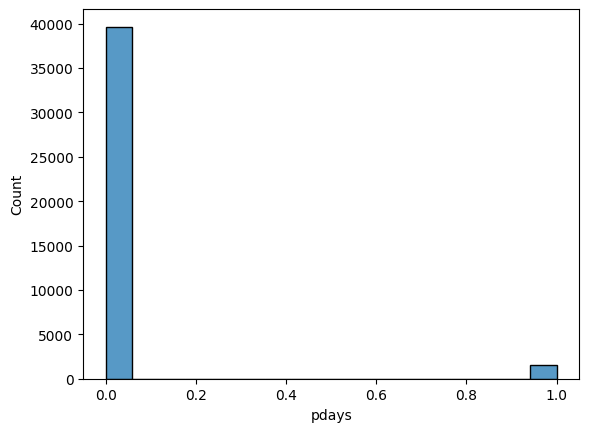

In [ ]:
sns.histplot(df["pdays"])

In [ ]:
num_cols.drop("pdays",axis=1,inplace=True)

# **Previous**

In [ ]:
df["previous"].value_counts()

,count
previous,
0,35551
1,4561
2,754
3,216
4,70
5,18
6,5
7,1


In [35]:
df.previous = df.previous.apply(lambda x: 1 if x > 0 else 0)

<Axes: xlabel='previous', ylabel='Count'>

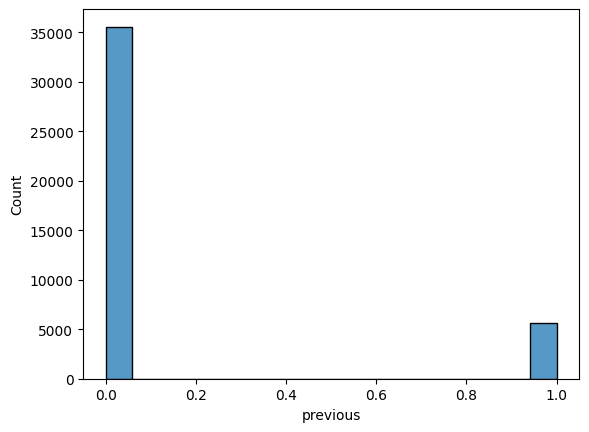

In [ ]:
sns.histplot(df["previous"])

In [ ]:
num_cols.drop("previous",axis=1,inplace=True)

# **Cons.conf.idx**

**Outliers**

In [ ]:
df["cons.conf.idx"].between(-26.949999999999,df["cons.conf.idx"].max()).value_counts()

,count
cons.conf.idx,
False,40730
True,446


In [ ]:
(df["cons.conf.idx"].between(-26.9499999,df["cons.conf.idx"].max()) & (df['y'] == 'no')).value_counts()

,count
False,40910
True,266


In [ ]:
266/446

0.5964125560538116

In [ ]:
446/(446+40730)

0.010831552360598407

**Not Outlier Values**

In [ ]:
(df["cons.conf.idx"].between(df["cons.conf.idx"].min(),-26.94999999) & (df['y'] == 'no')).value_counts()

,count
True,36271
False,4905


In [ ]:
36271/40730

0.8905229560520501

As we can see Outlier groups have different target distribution than whole dataset. That's why most of outliers carry information about minority class. They can be removed or not depends on the marketing strategy

# **Boxplot of Variables That Have Outliers**

Text(0.5, 1.0, ' Cons.Conf Boxplot')

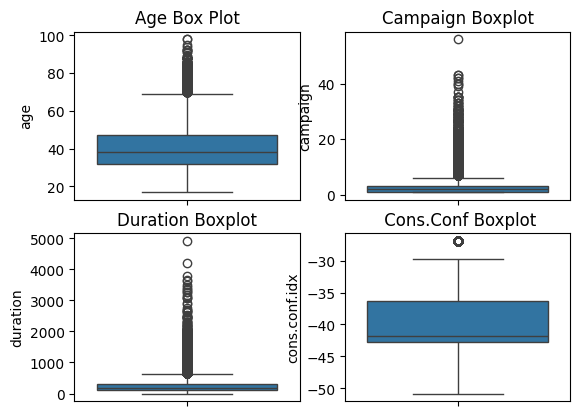

In [ ]:
plt.subplot(2,2,1)
sns.boxplot(df["age"])
plt.title("Age Box Plot")


plt.subplot(2,2,3)
sns.boxplot(df["duration"])
plt.title("Duration Boxplot")


plt.subplot(2,2,2)
sns.boxplot(df["campaign"])
plt.title("Campaign Boxplot")


plt.subplot(2,2,4)
sns.boxplot(df["cons.conf.idx"])
plt.title(" Cons.Conf Boxplot")

# **Data Visualization**

# **Target Variable**

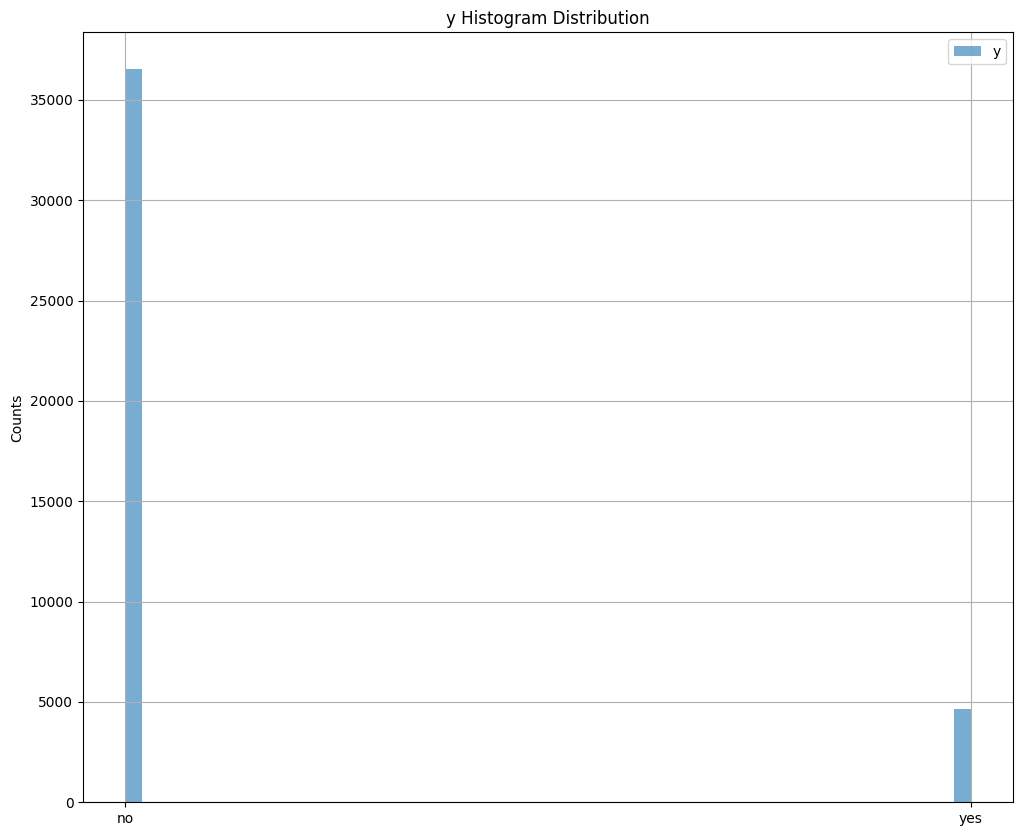

In [ ]:
plt.figure(figsize=(12,10))


df["y"].hist(bins=50,label="y",alpha=0.6)
plt.ylabel("Counts")
plt.title("y Histogram Distribution");
plt.legend()



As we can see, big majority of answers are No(Inbalance Dataset.)

# **Age**

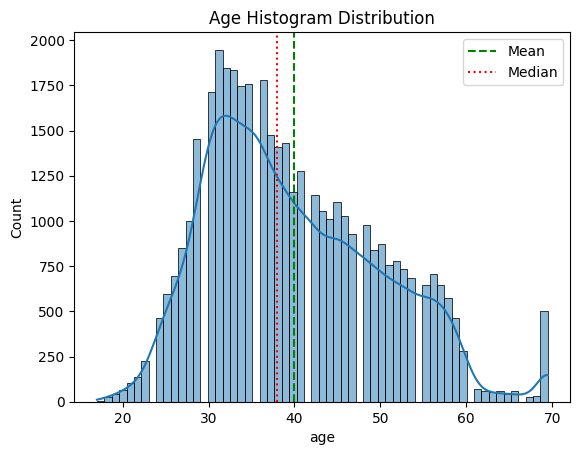

In [ ]:
sns.histplot(df["age"],kde=True)
plt.axvline(np.mean(df["age"]),ls="--",c="g",label="Mean")
plt.axvline(np.median(df["age"]),ls=":",c="r",label="Median")
plt.title("Age Histogram Distribution");
plt.legend()

Average age and Median Age are close to 40

# **Marital Status**

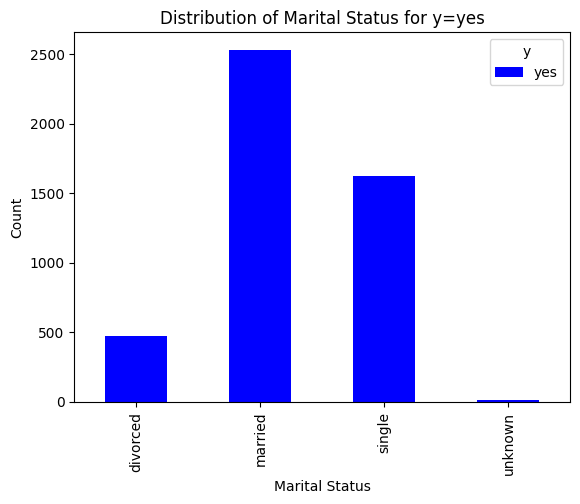

In [ ]:
cross_table = pd.crosstab(df[df['y'] == 'yes']['marital'], df[df['y'] == 'yes']['y'])
cross_table.plot(kind='bar', stacked=False,color=["b"])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status for y=yes')
plt.show()

Married people mostly tend to reply as yes. Divorced people however least one.

# **Education**

<ipython-input-40-788b27e19bb4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df[df['y'] == 'yes'],palette=["y"])
<ipython-input-40-788b27e19bb4>:1: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='education', data=df[df['y'] == 'yes'],palette=["y"])


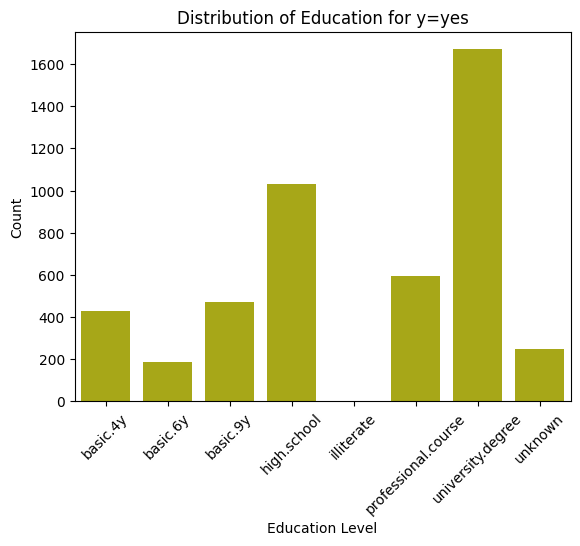

In [ ]:
sns.countplot(x='education', data=df[df['y'] == 'yes'],palette=["y"])

plt.xticks(rotation=45)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education for y=yes')
plt.show()

University degree holders tends to say yes most compared to other education levels.

# **Loan**

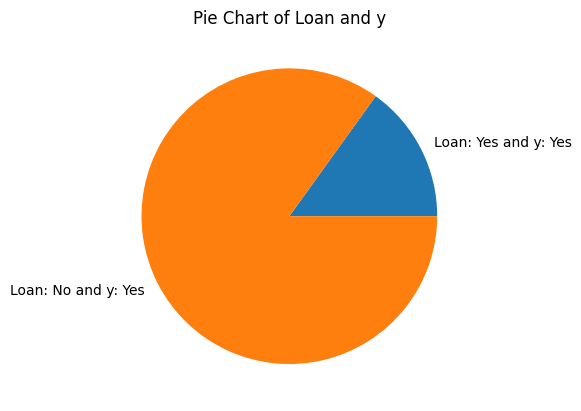

In [ ]:
yes_loan_count_yes= ((df['loan'] == 'yes') & (df['y'] == 'yes')).value_counts().get(True, 0)
no_loan_count_yes = ((df['loan'] == 'no') & (df['y'] == 'yes')).value_counts().get(True, 0)

numbers = [yes_loan_count_yes, no_loan_count_yes]
labels = ['Loan: Yes and y: Yes', 'Loan: No and y: Yes']
plt.pie(numbers, labels=labels)
plt.title('Pie Chart of Loan and y')

plt.show()

The ones who don't have personal loans tend to say yes more than the ones who have it.

# **Consumer Price Index**

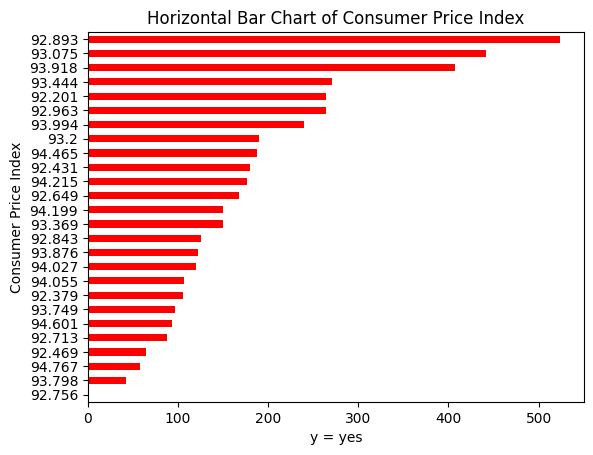

In [ ]:
cons_price_idx = (df[df['y'] == 'yes']['cons.price.idx'].value_counts()).sort_values()
cons_price_idx.plot(kind='barh', color='r')
plt.ylabel('Consumer Price Index')
plt.xlabel('y = yes')
plt.title('Horizontal Bar Chart of Consumer Price Index')
plt.show()

# **Housing**

<Axes: xlabel='housing', ylabel='Count'>

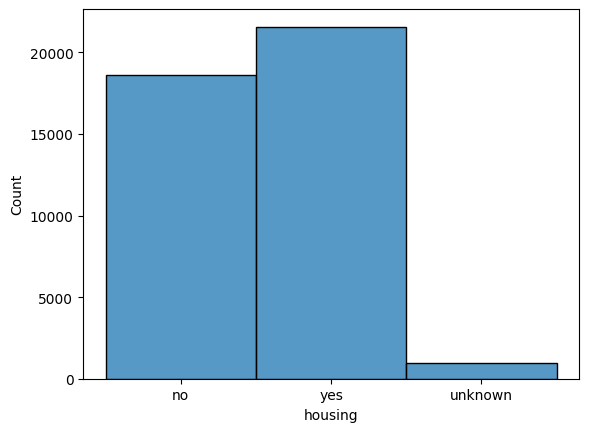

In [ ]:
sns.histplot(df["housing"])

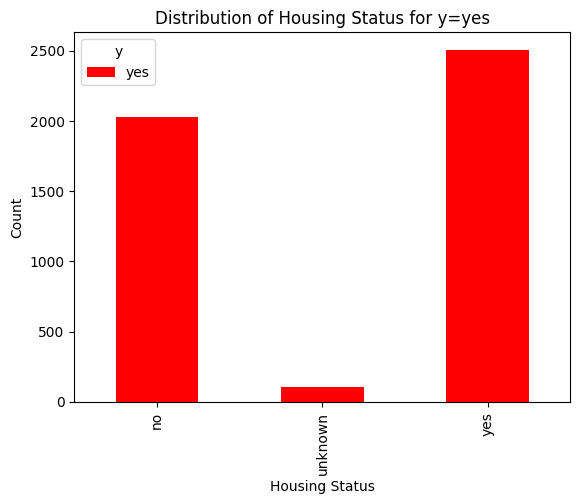

In [ ]:
cross_table = pd.crosstab(df[df['y'] == 'yes']['housing'], df[df['y'] == 'yes']['y'])
cross_table.plot(kind='bar', stacked=False,color=["r"])
plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.title('Distribution of Housing Status for y=yes')
plt.show()

# **Job**

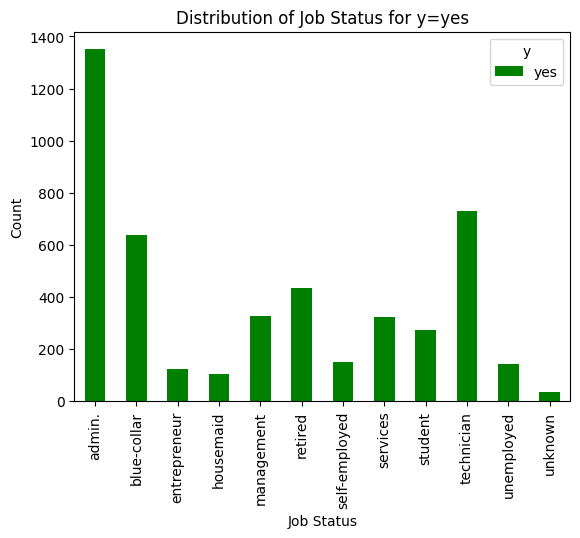

In [ ]:
cross_table = pd.crosstab(df[df['y'] == 'yes']['job'], df[df['y'] == 'yes']['y'])
cross_table.plot(kind='bar', stacked=False,color=["g"])
plt.xlabel('Job Status')
plt.ylabel('Count')
plt.title('Distribution of Job Status for y=yes')
plt.show()

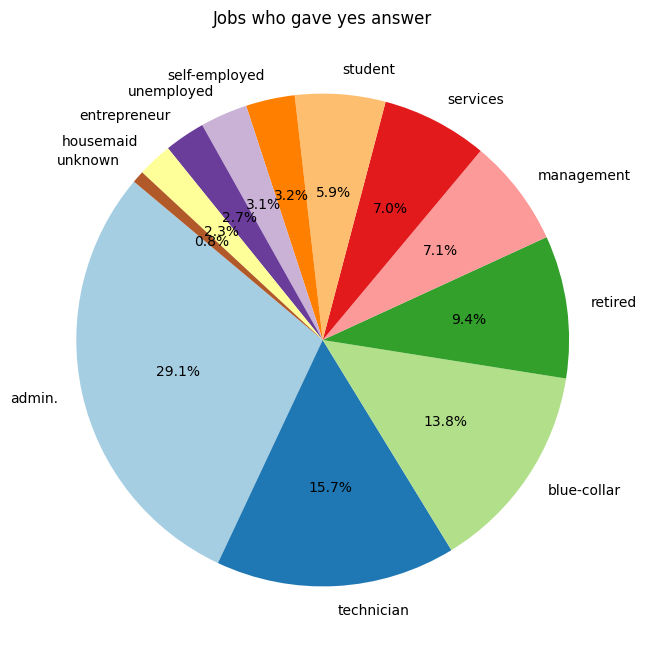

In [ ]:

yes_counts = df[df['y'] == 'yes']['job'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(yes_counts,labels=yes_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Jobs who gave yes answer")

plt.show()


# **Campaign**

<Axes: xlabel='campaign', ylabel='Count'>

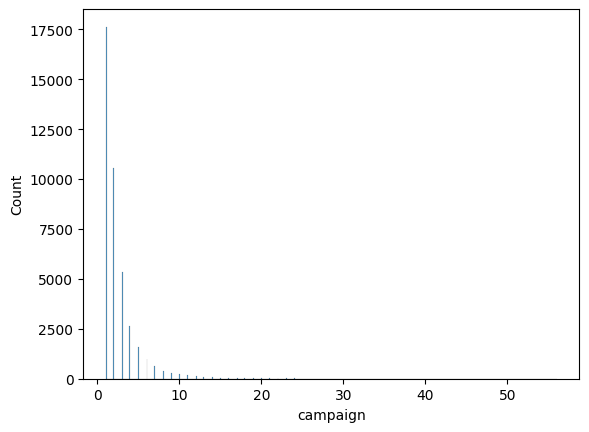

In [ ]:
sns.histplot(df["campaign"])

# **Duration**

<Axes: xlabel='duration', ylabel='Count'>

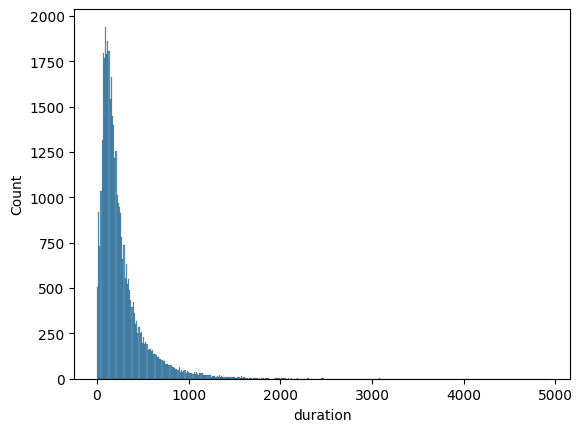

In [ ]:
sns.histplot(df["duration"])

In [ ]:
df["duration"].index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 41186, 41187],
      dtype='int64', length=41176)

In [36]:
df.drop(df[(df["duration"]==0)].index,inplace=True)

If duration number is 0,it means call didn't happen. So answer will be no automatically. It is wrong and can affect the model wrong.

# **Heatmap**

<Axes: >

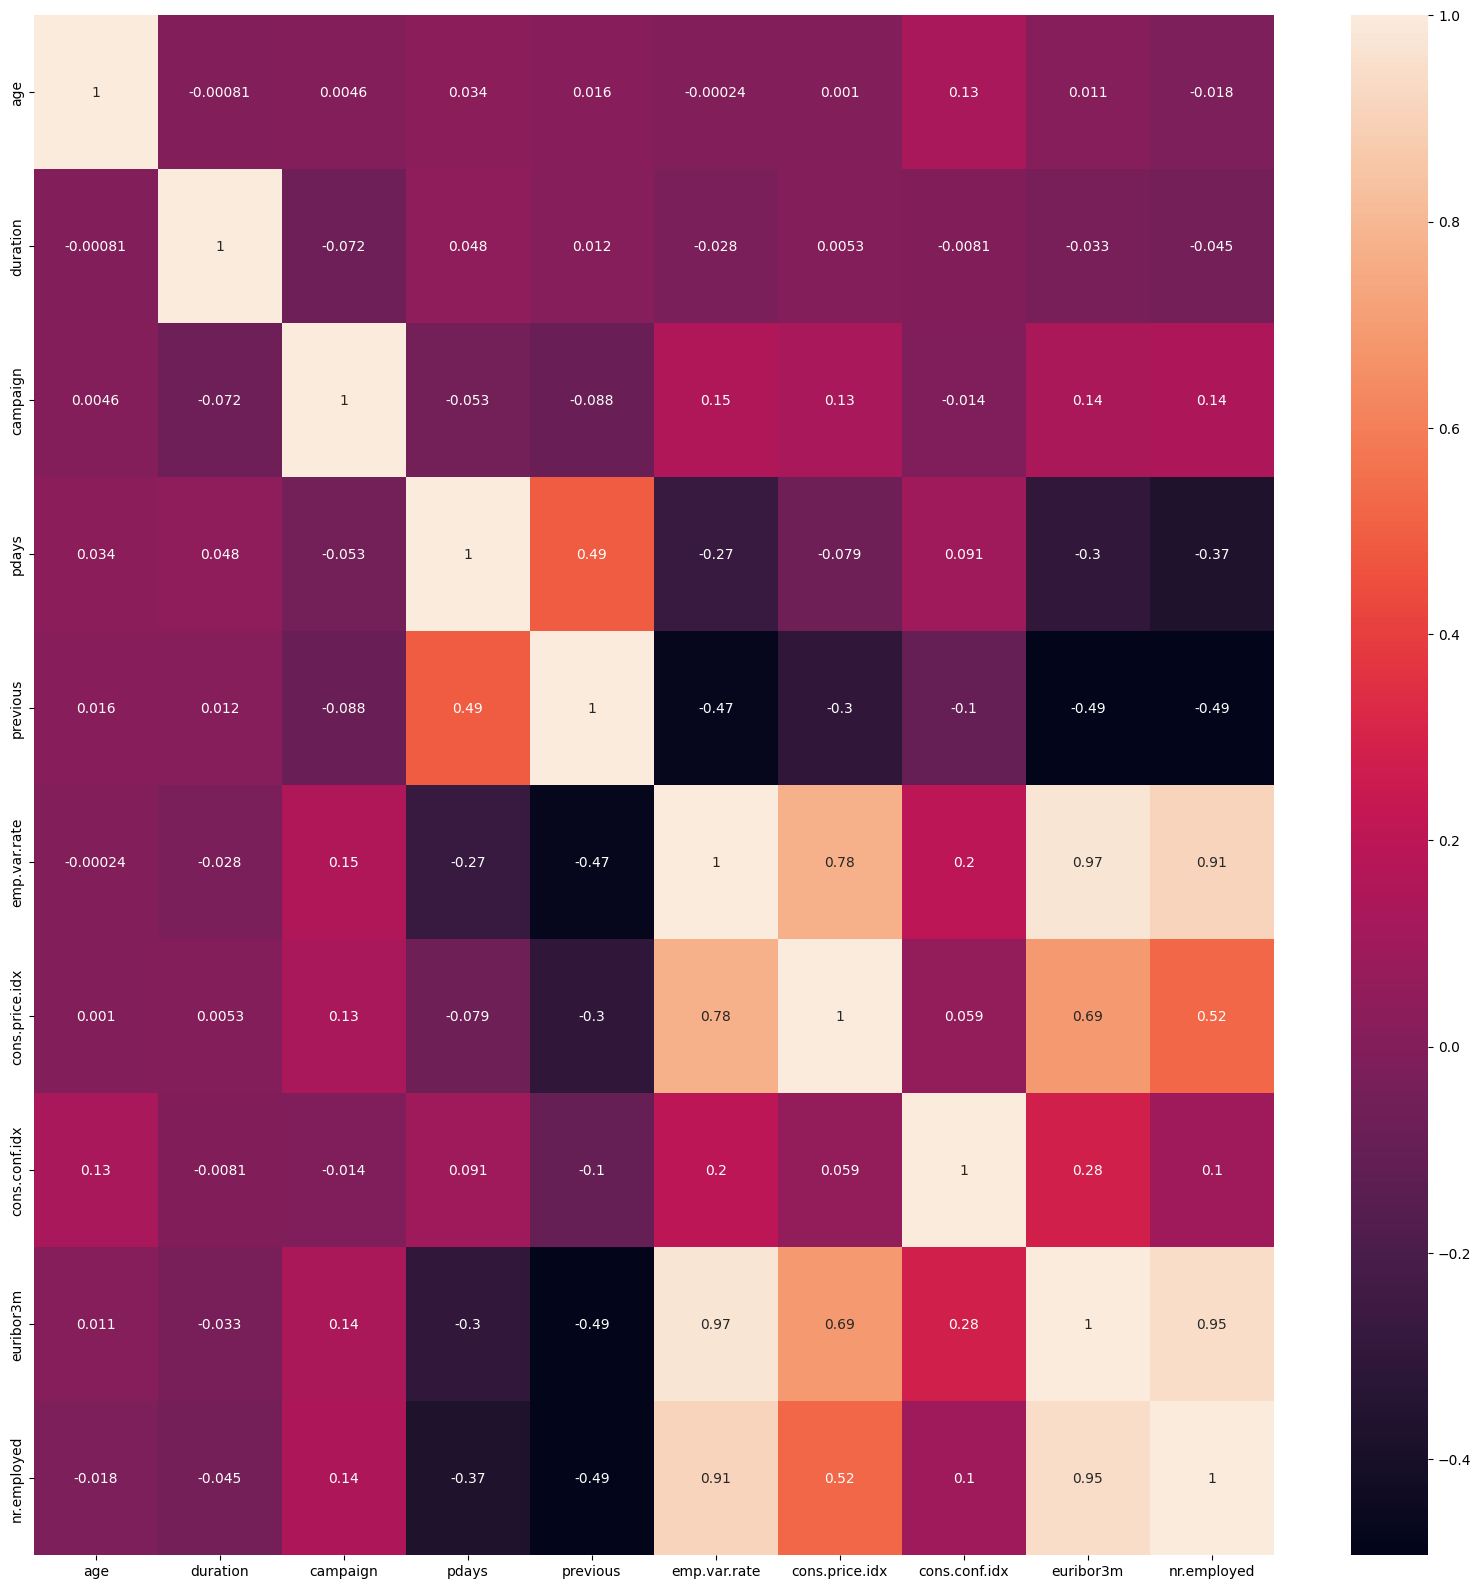

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df[list(num_cols)].corr(),annot=True)

In [37]:
df["emp.var.rate*euribor3m*nr.employed"]=df["emp.var.rate"]*df["euribor3m"]*df["nr.employed"]

In [38]:
df.drop(["emp.var.rate","euribor3m","nr.employed"],inplace=True,axis=1)

# **Converting to Unknown Variables to Null Variables**

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,euribor3m*emp.var.rate*nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,-36.4,no,27733.9557
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,-36.4,no,27733.9557
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,-36.4,no,27733.9557
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,-36.4,no,27733.9557
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,-36.4,no,27733.9557


In [14]:
cat_cols=df.select_dtypes("object")

In [15]:
cat_cols=list(cat_cols)

In [ ]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
(df[list(cat_cols)]=="unknown").sum()

,0
job,330
marital,80
education,1730
default,8596
housing,990
loan,990
contact,0
month,0
day_of_week,0
poutcome,0


In [39]:
df[["job","marital","loan","default","housing","education"]]=df[["job","marital","loan","default","housing","education"]].replace("unknown",np.NaN)

In [ ]:
df.isnull().sum()

,0
age,0
job,330
marital,80
education,1730
default,8596
housing,990
loan,990
contact,0
month,0
day_of_week,0


To understand that missing values are MACR or MAR, missingno can be used.

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

<Axes: >

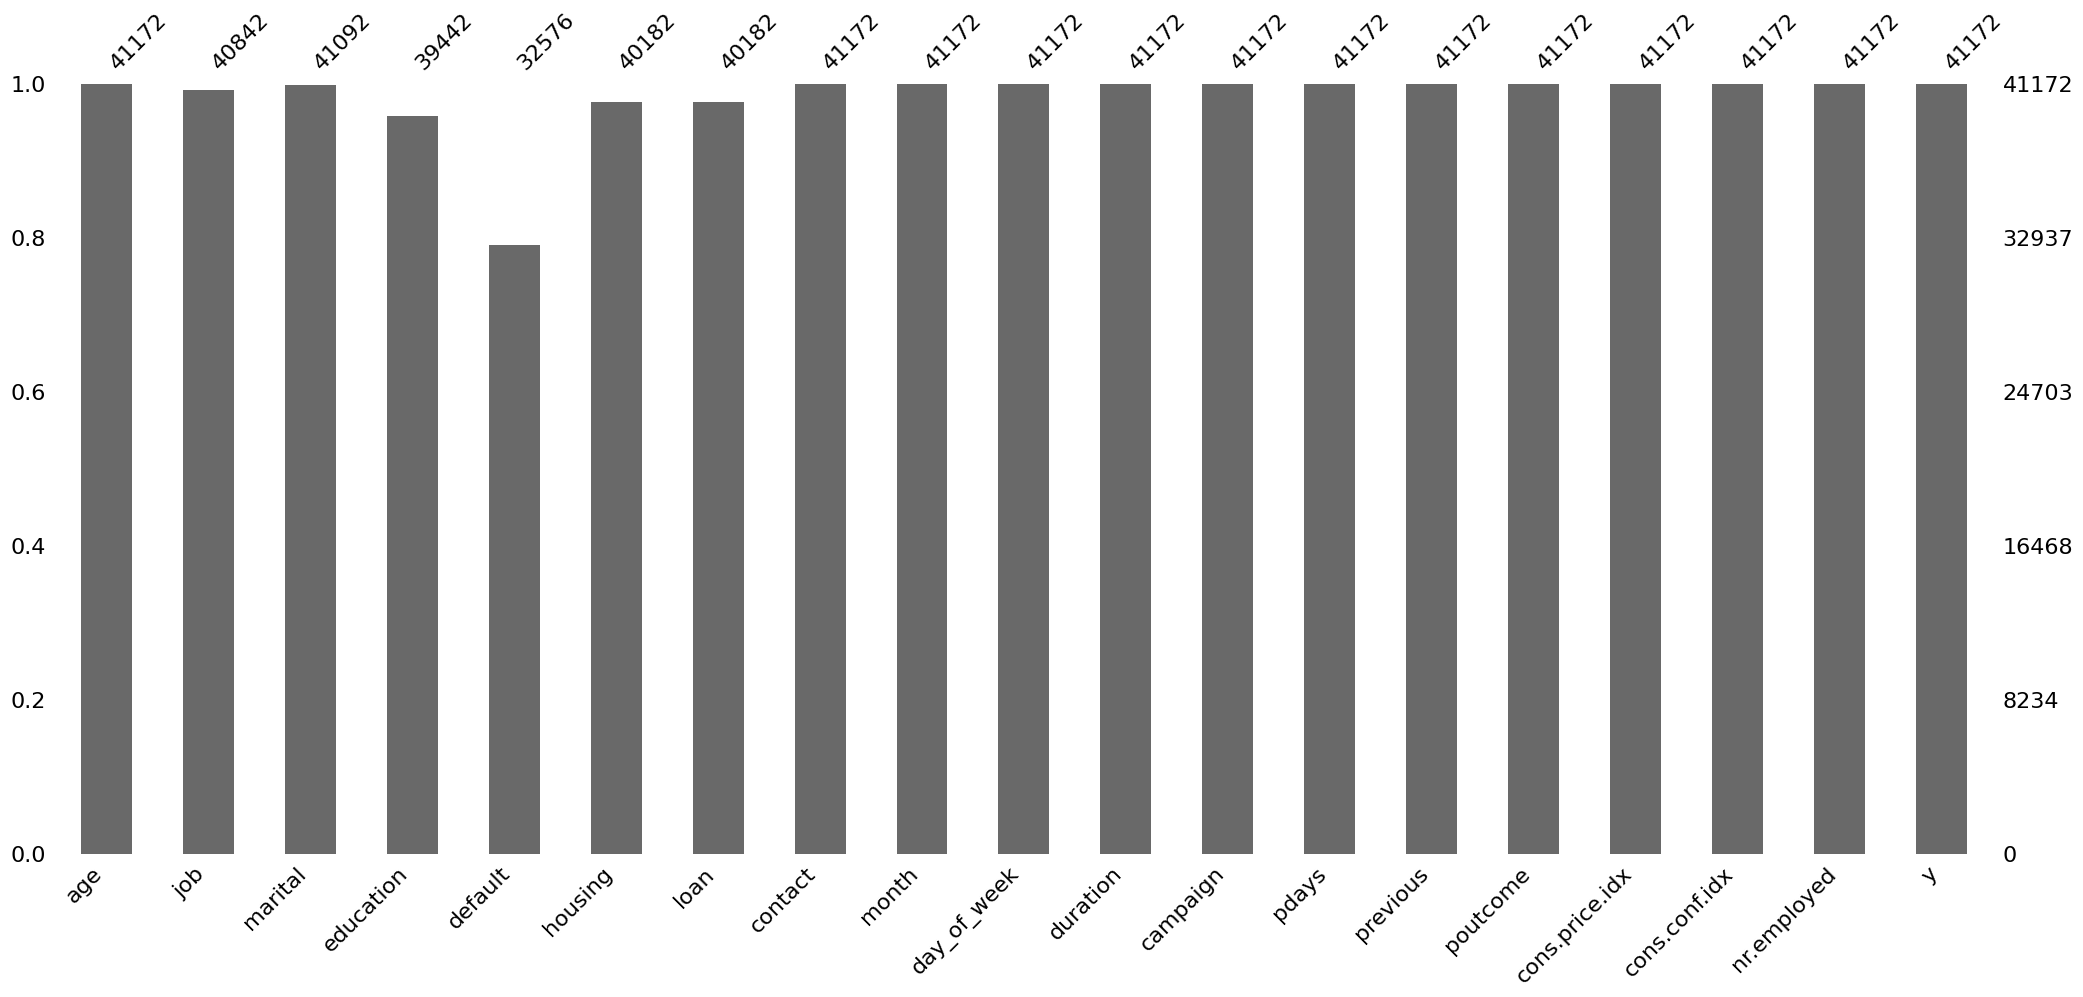

In [ ]:
msno.bar(df)

In [ ]:
df.isnull().mean()*100

age                0.000000
job                0.801516
marital            0.194307
education          4.201885
default           20.878267
housing            2.404547
loan               2.404547
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

<Axes: >

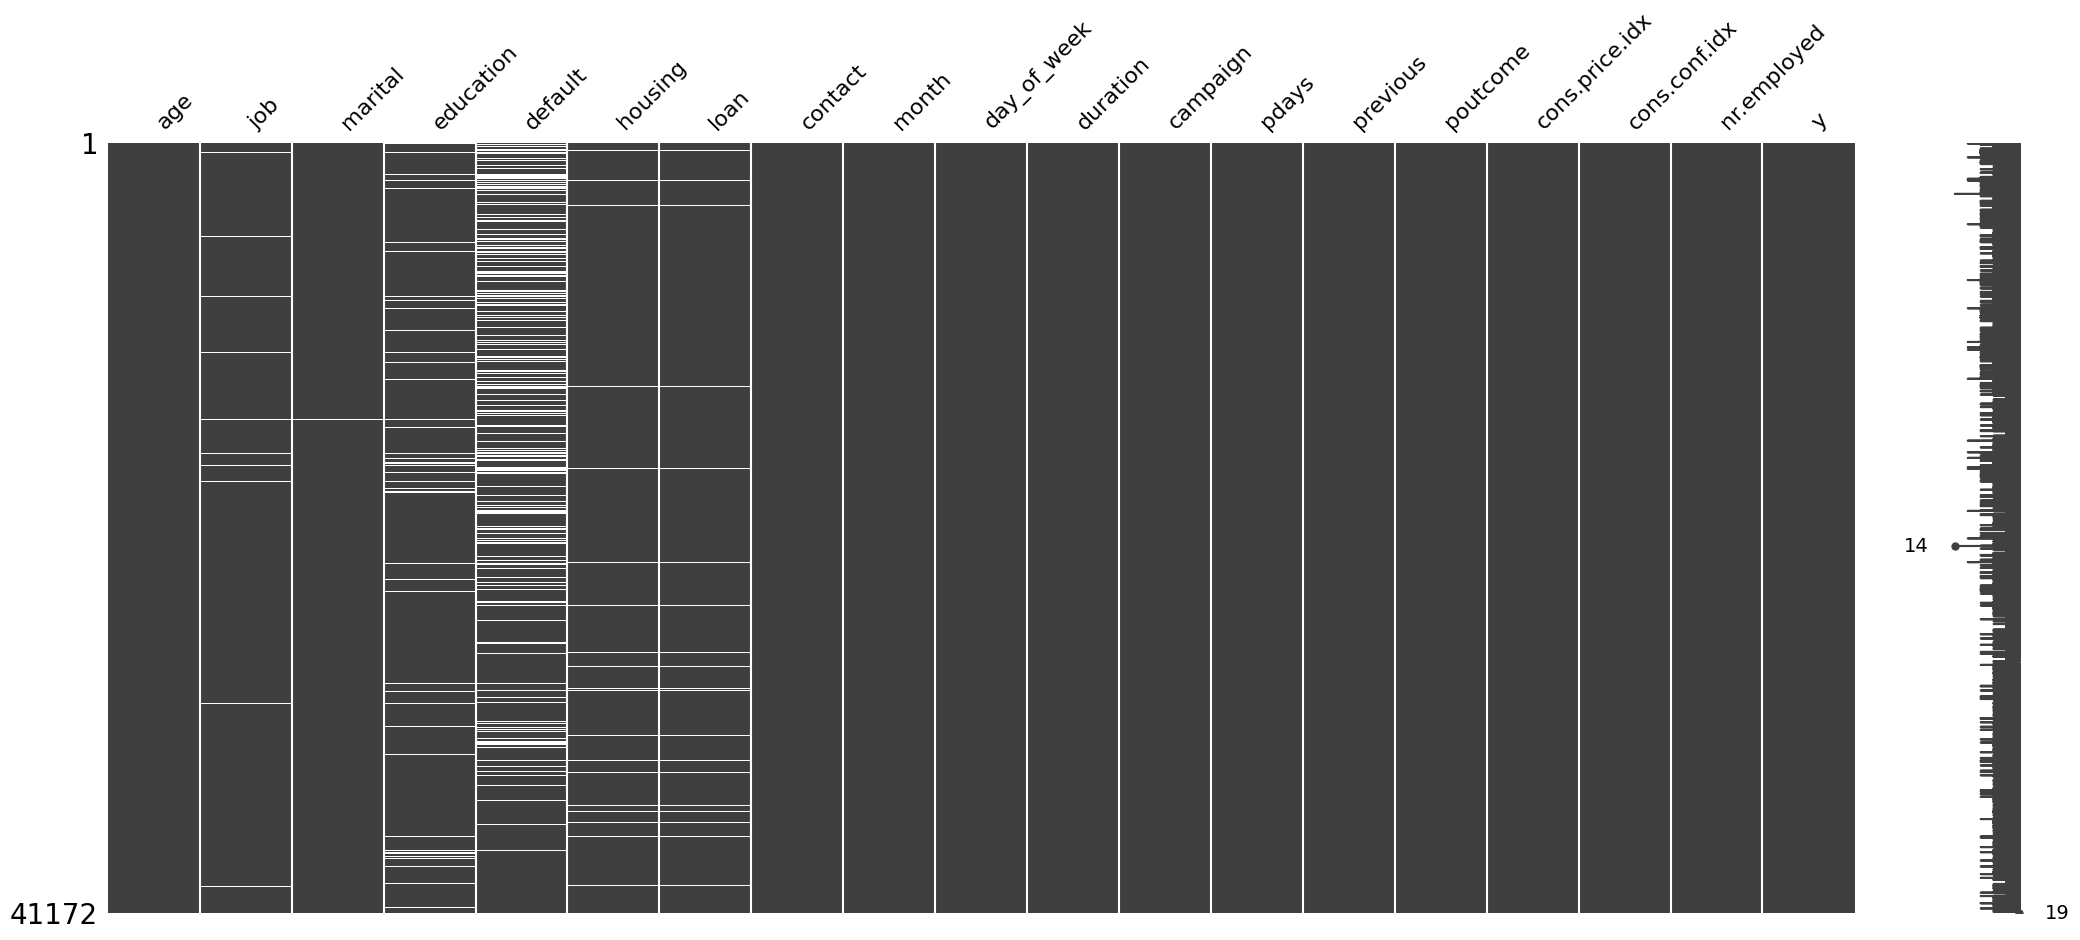

In [ ]:
msno.matrix(df)

<Axes: >

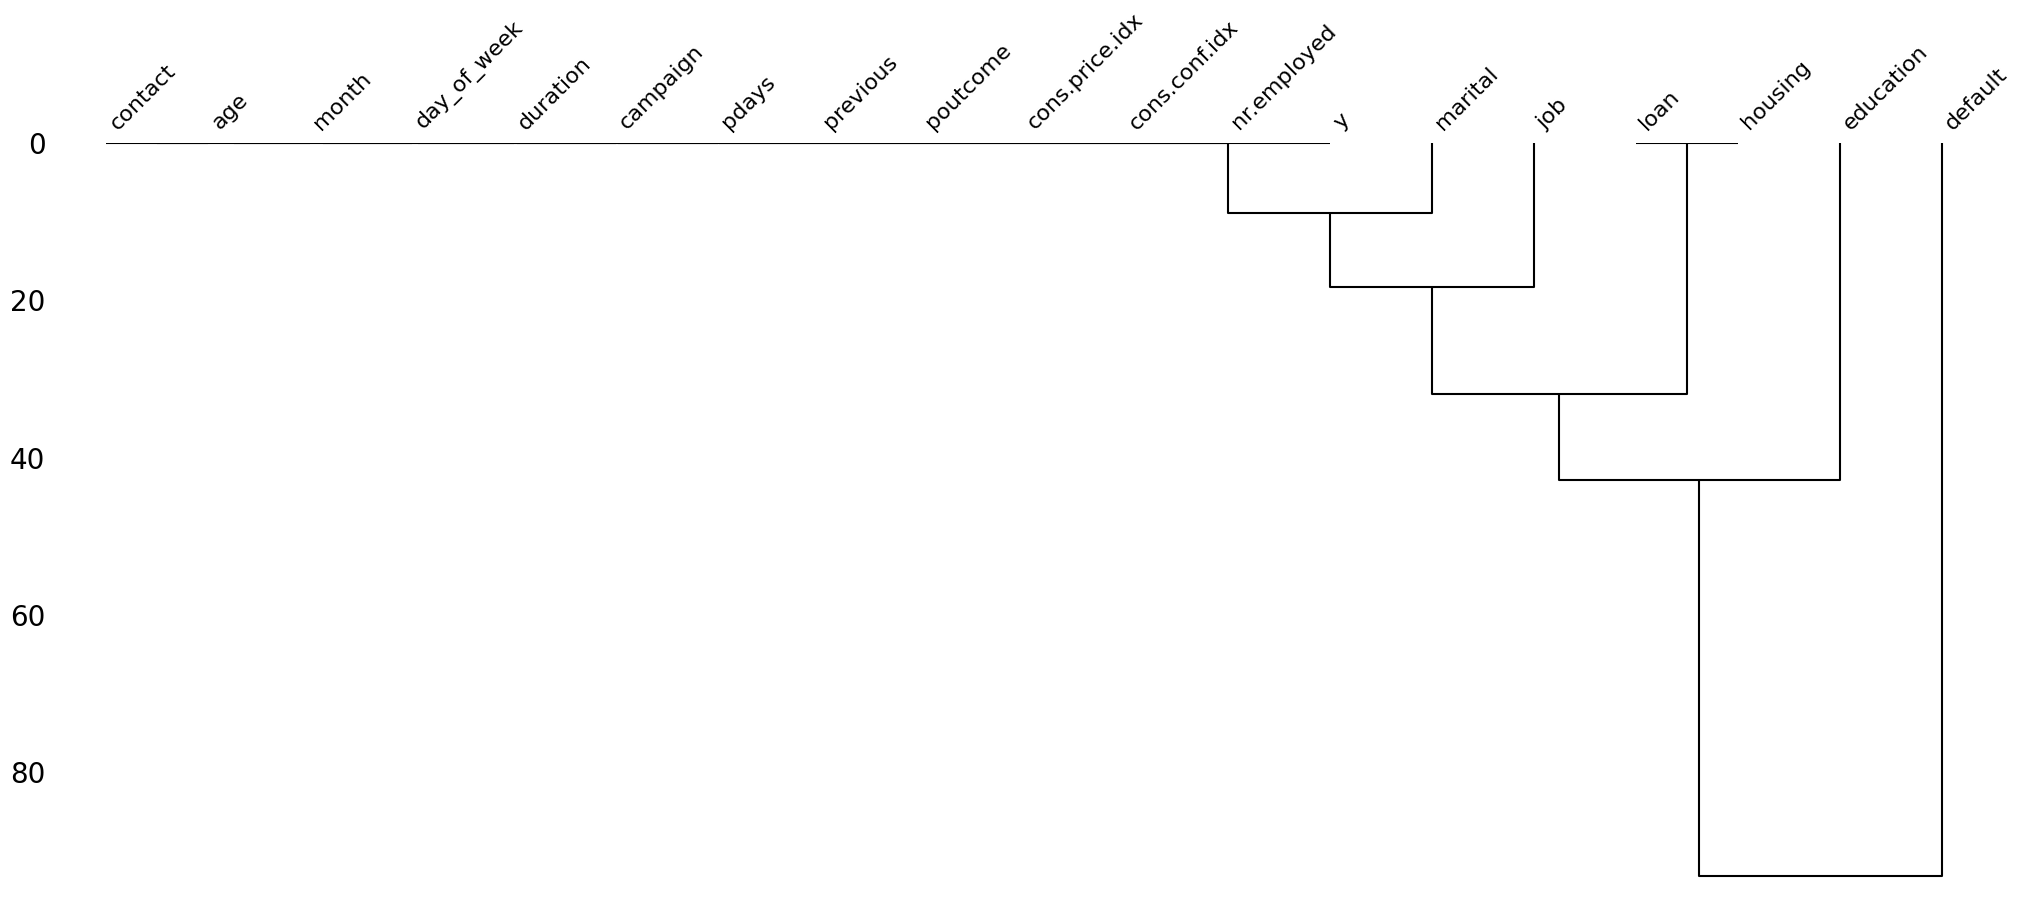

In [ ]:
msno.dendrogram(df)

As we can see, some missing values have correlation. They can be MAR. To examine the relationship between columns which has missing values and other categorical columns,chi squared independence test can help(since all missing columns are categorical and nominal)

In [11]:
from scipy import stats

In [12]:
missing=["job","marital","loan","default","housing","education"]

In [16]:
import itertools
combinations = list(itertools.combinations(cat_cols, 2))
print(combinations)

[('job', 'marital'), ('job', 'education'), ('job', 'default'), ('job', 'housing'), ('job', 'loan'), ('job', 'contact'), ('job', 'month'), ('job', 'day_of_week'), ('job', 'poutcome'), ('job', 'y'), ('marital', 'education'), ('marital', 'default'), ('marital', 'housing'), ('marital', 'loan'), ('marital', 'contact'), ('marital', 'month'), ('marital', 'day_of_week'), ('marital', 'poutcome'), ('marital', 'y'), ('education', 'default'), ('education', 'housing'), ('education', 'loan'), ('education', 'contact'), ('education', 'month'), ('education', 'day_of_week'), ('education', 'poutcome'), ('education', 'y'), ('default', 'housing'), ('default', 'loan'), ('default', 'contact'), ('default', 'month'), ('default', 'day_of_week'), ('default', 'poutcome'), ('default', 'y'), ('housing', 'loan'), ('housing', 'contact'), ('housing', 'month'), ('housing', 'day_of_week'), ('housing', 'poutcome'), ('housing', 'y'), ('loan', 'contact'), ('loan', 'month'), ('loan', 'day_of_week'), ('loan', 'poutcome'), ('

In [17]:
for i,j in combinations:
  crosstab=pd.crosstab(df[i],df[j])
  if stats.chi2_contingency(crosstab)[1]<0.05:
    if i in missing:
       print(i,j,stats.chi2_contingency(crosstab)[1])


job marital 0.0
job education 0.0
job default 0.048598679115388836
job housing 0.01349050903878349
job loan 0.022552795056695243
job contact 8.044291413817121e-136
job month 0.0
job day_of_week 0.0007329359112586468
job poutcome 1.2297994338428834e-162
job y 3.301748272721321e-200
marital education 0.0
marital housing 0.014806031051260002
marital contact 1.145975632608307e-47
marital month 3.110685179661355e-58
marital day_of_week 0.00698102689338355
marital poutcome 3.991692479553512e-23
marital y 3.36924630870627e-27
education housing 0.002008299741177312
education contact 6.482200747506248e-130
education month 0.0
education day_of_week 6.977699677255579e-07
education poutcome 8.875223009859245e-26
education y 2.6469425568074525e-35
default day_of_week 0.01508677208383632
housing loan 1.4626203966233582e-20
housing contact 5.457815988229117e-62
housing month 3.1699041566434964e-44
housing day_of_week 0.00034769685533050487
housing poutcome 2.1786620603847787e-06
housing y 0.019565929

As we can see columns that have missing values have correlation between other categorical columns.(since p values are smaller than 0.05,hypothesis 0 which claims that all variables are independent were refused.)

In [18]:

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape)
    return np.sqrt(chi2 / (n * (k - 1)))


categorical_columns = df.select_dtypes(include=['object', 'category']).columns


cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)


for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])


cramers_v_matrix = cramers_v_matrix.astype(float)


print("Cramér's V Matrisi:")
print(cramers_v_matrix)

Cramér's V Matrisi:
                  job   marital  education   default   housing      loan  \
job          1.000000  0.222775   0.388490  0.023829  0.023671  0.022842   
marital      0.222775  1.000000   0.145743  0.008281  0.014494  0.006508   
education    0.388490  0.145743   1.000000  0.015726  0.023234  0.013212   
default      0.023829  0.008281   0.015726  1.000000  0.000795  0.000000   
housing      0.023671  0.014494   0.023234  0.000795  1.000000  0.046371   
loan         0.022842  0.006508   0.013212  0.000000  0.046371  1.000000   
contact      0.127329  0.072527   0.125014  0.003364  0.082881  0.012039   
month        0.110925  0.062900   0.103411  0.016388  0.075430  0.021171   
day_of_week  0.021371  0.016008   0.021546  0.019450  0.022748  0.012178   
poutcome     0.100709  0.036786   0.043465  0.006751  0.025472  0.000836   
y            0.153443  0.054465   0.066758  0.000000  0.011646  0.004586   

              contact     month  day_of_week  poutcome         y  


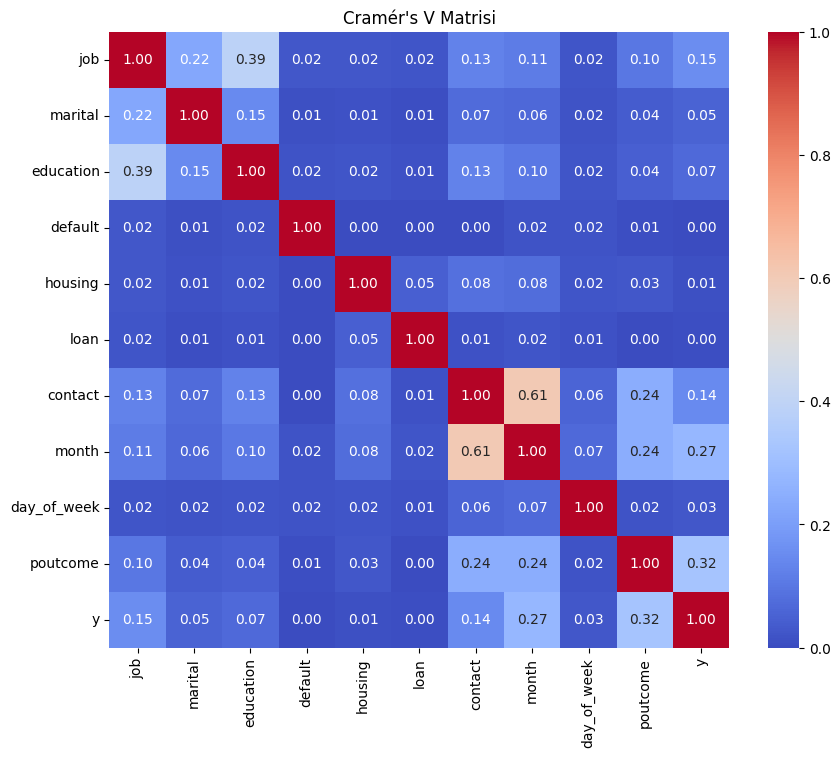

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Matrisi")
plt.show()


In [40]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)
df_clean_imputed = imputer.fit_transform(df)

df_clean_imputed = pd.DataFrame(df_clean_imputed, columns=df.columns)
print(df_clean_imputed.head())


    age  job  marital  education  default  housing  loan  contact  month  \
0  56.0  3.0      1.0        0.0      1.0      1.0   1.0      1.0    6.0   
1  57.0  8.0      1.0        3.0      0.0      1.0   1.0      1.0    6.0   
2  37.0  8.0      1.0        3.0      1.0      2.0   1.0      1.0    6.0   
3  40.0  0.0      1.0        1.0      1.0      1.0   1.0      1.0    6.0   
4  56.0  8.0      1.0        3.0      1.0      1.0   2.0      1.0    6.0   

   day_of_week  duration  campaign  pdays  previous  poutcome  cons.price.idx  \
0          1.0     261.0       1.0    0.0       0.0       1.0          93.994   
1          1.0     149.0       1.0    0.0       0.0       1.0          93.994   
2          1.0     226.0       1.0    0.0       0.0       1.0          93.994   
3          1.0     151.0       1.0    0.0       0.0       1.0          93.994   
4          1.0     307.0       1.0    0.0       0.0       1.0          93.994   

   cons.conf.idx    y  emp.var.rate*euribor3m*nr.employe

In [41]:
df=df_clean_imputed

In [42]:
X=df.drop("y",axis=1)
y=df["y"]

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [44]:
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Base Models**

**Base SVM**

Accuracy: 0.9039

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      7291
         1.0       0.70      0.28      0.40       944

    accuracy                           0.90      8235
   macro avg       0.81      0.63      0.67      8235
weighted avg       0.89      0.90      0.89      8235


Confusion Matrix:
[[7179  112]
 [ 679  265]]


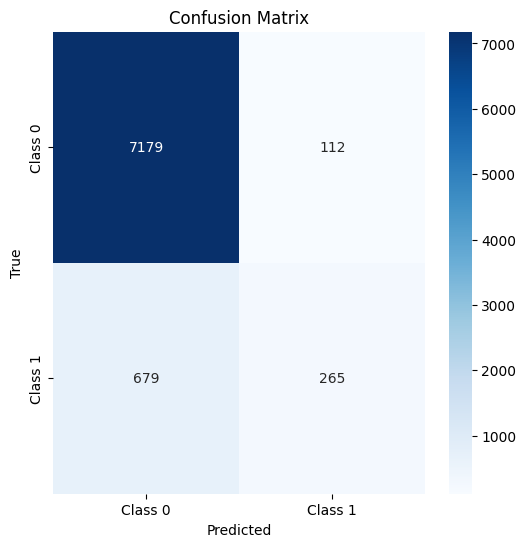

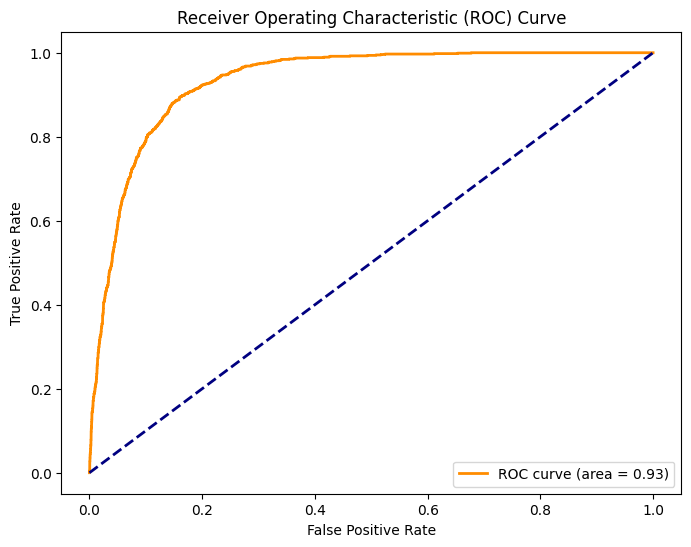


Tuned Model Accuracy: 0.9078

Tuned Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7291
         1.0       0.67      0.38      0.49       944

    accuracy                           0.91      8235
   macro avg       0.80      0.68      0.72      8235
weighted avg       0.90      0.91      0.90      8235


Tuned Confusion Matrix:
[[7115  176]
 [ 583  361]]


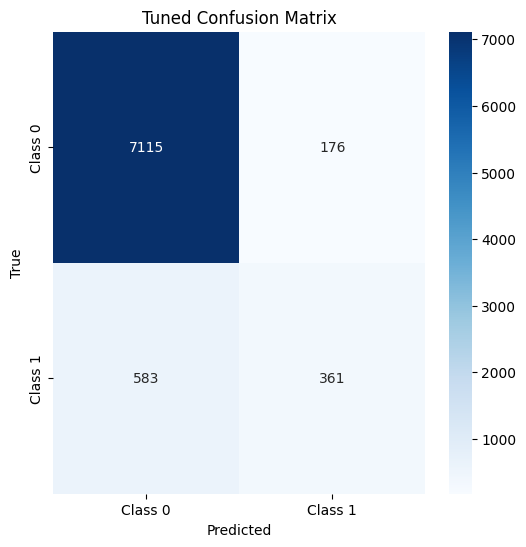

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

clf = SVC(probability=True, random_state=42)
clf.fit(X_train_scaled, y_train)


y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


y_proba = clf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

clf_tuned = SVC(C=10, kernel='rbf', probability=True, random_state=42)
clf_tuned.fit(X_train_scaled, y_train)

y_pred_tuned = clf_tuned.predict(X_test_scaled)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTuned Model Accuracy: {accuracy_tuned:.4f}")

print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))

conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\nTuned Confusion Matrix:")
print(conf_matrix_tuned)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Tuned Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


**Base Logistic Regression**

Accuracy: 0.9080

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7291
         1.0       0.67      0.38      0.49       944

    accuracy                           0.91      8235
   macro avg       0.80      0.68      0.72      8235
weighted avg       0.90      0.91      0.90      8235


Confusion Matrix:
[[7114  177]
 [ 581  363]]


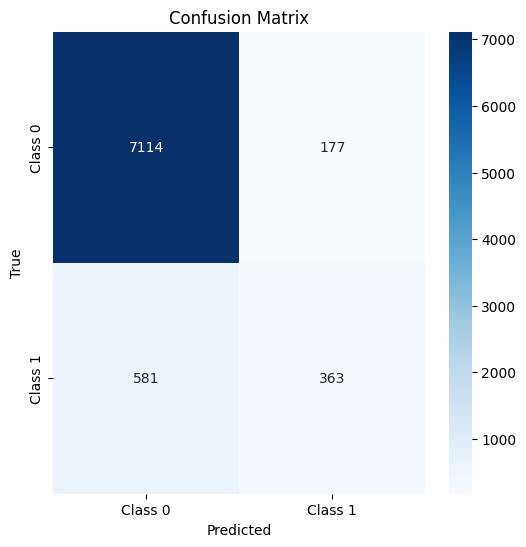

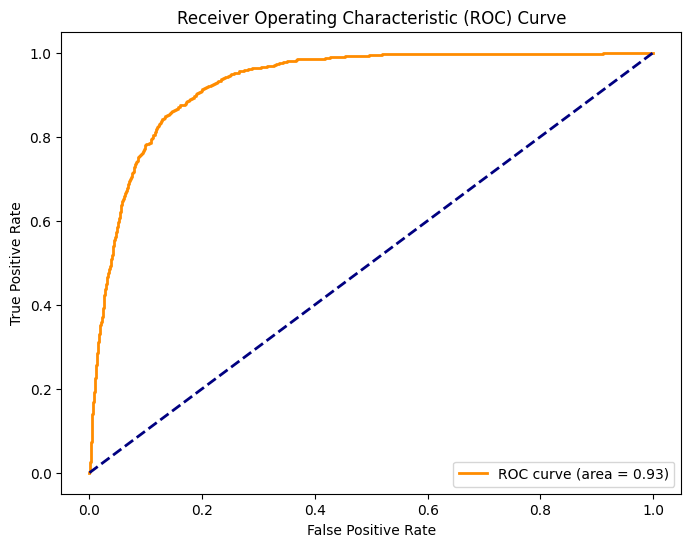


Tuned Model Accuracy: 0.9098

Tuned Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      7291
         1.0       0.67      0.42      0.51       944

    accuracy                           0.91      8235
   macro avg       0.80      0.69      0.73      8235
weighted avg       0.90      0.91      0.90      8235


Tuned Confusion Matrix:
[[7100  191]
 [ 552  392]]


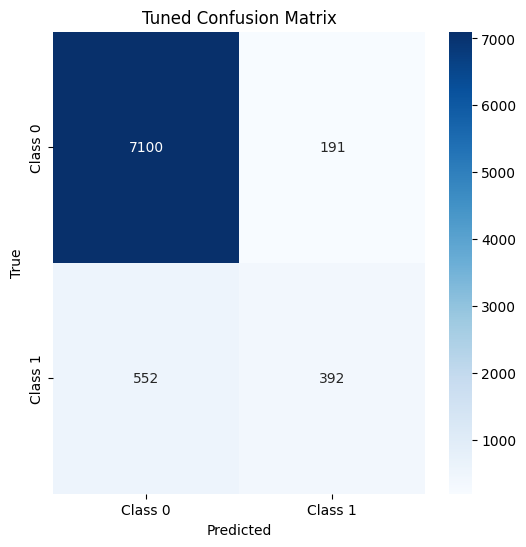

In [46]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

log_reg_tuned = LogisticRegression(random_state=42, C=10, solver='liblinear')
log_reg_tuned.fit(X_train_scaled, y_train)

y_pred_tuned = log_reg_tuned.predict(X_test_scaled)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTuned Model Accuracy: {accuracy_tuned:.4f}")

print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))

conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\nTuned Confusion Matrix:")
print(conf_matrix_tuned)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Tuned Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


**Base GradientBoost**

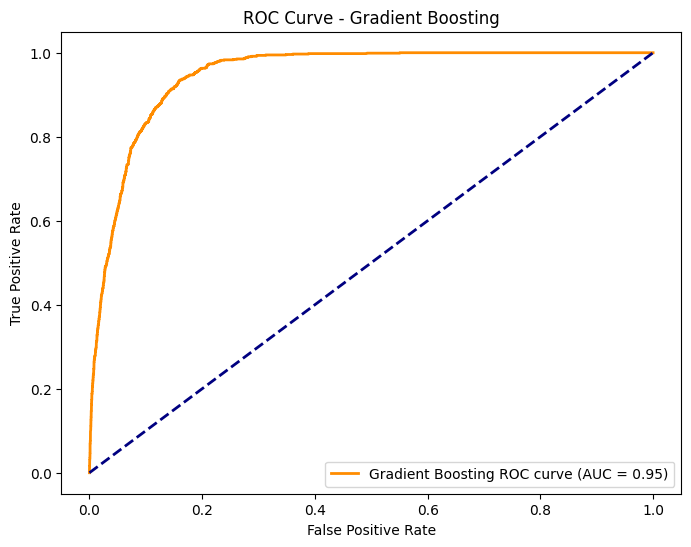


Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      7291
         1.0       0.68      0.50      0.57       944

    accuracy                           0.92      8235
   macro avg       0.81      0.73      0.76      8235
weighted avg       0.91      0.92      0.91      8235



In [47]:

from sklearn.metrics import roc_curve, auc, classification_report


gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

y_prob_gb = gb.predict_proba(X_test_scaled)[:, 1]


fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='Gradient Boosting ROC curve (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, gb.predict(X_test_scaled)))


**Base CatBoost**

Accuracy: 0.9168

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      7291
         1.0       0.67      0.54      0.60       944

    accuracy                           0.92      8235
   macro avg       0.81      0.75      0.78      8235
weighted avg       0.91      0.92      0.91      8235


Confusion Matrix:
[[7037  254]
 [ 431  513]]


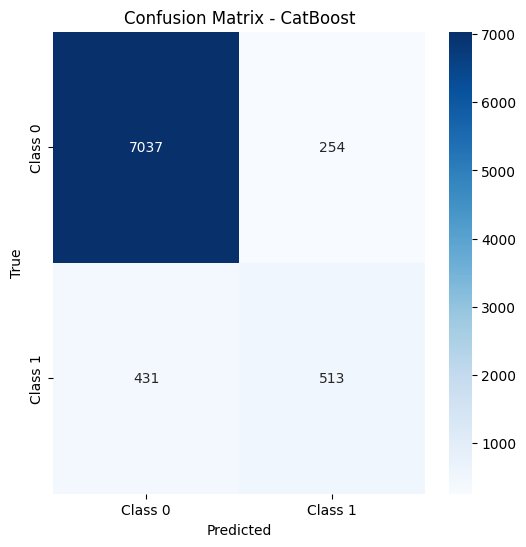

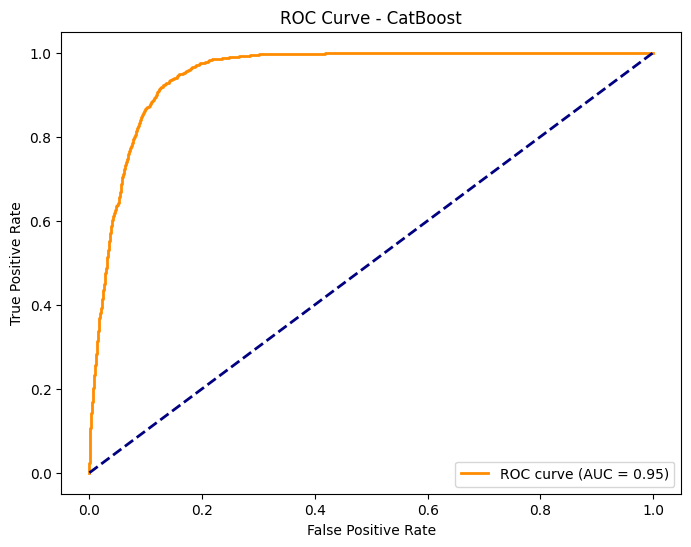

In [48]:

catboost_model = CatBoostClassifier(iterations=1000, random_state=42, verbose=0)
catboost_model.fit(X_train_scaled, y_train)


y_pred_catboost = catboost_model.predict(X_test_scaled)

accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"Accuracy: {accuracy_catboost:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_catboost))

conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
print("\nConfusion Matrix:")
print(conf_matrix_catboost)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_catboost, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

y_prob_catboost = catboost_model.predict_proba(X_test_scaled)[:, 1]

fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_prob_catboost)
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

plt.figure(figsize=(8, 6))
plt.plot(fpr_catboost, tpr_catboost, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_catboost)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend(loc='lower right')
plt.show()


**Base XgBoost**


Confusion Matrix:
[[7033  258]
 [ 439  505]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      7291
         1.0       0.66      0.53      0.59       944

    accuracy                           0.92      8235
   macro avg       0.80      0.75      0.77      8235
weighted avg       0.91      0.92      0.91      8235


ROC AUC Score: 0.95


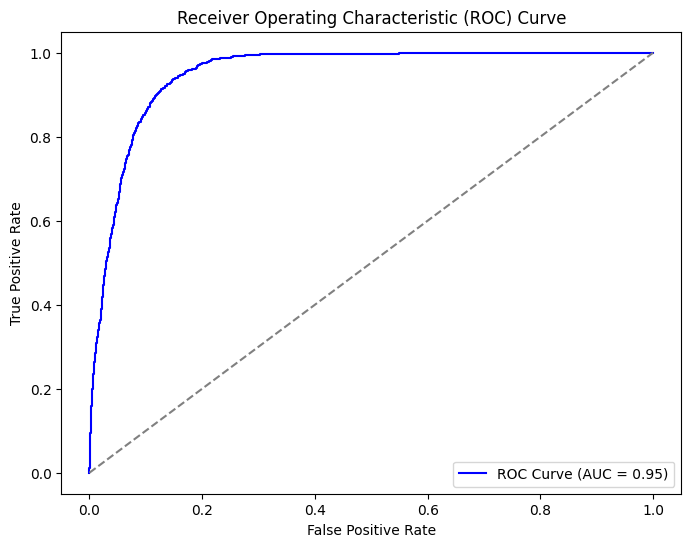

In [49]:

xgb_clf = xgb.XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

xgb_clf.fit(X_train_scaled, y_train)

y_pred = xgb_clf.predict(X_test_scaled)
y_prob = xgb_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Base RandomForest**


Confusion Matrix:
[[7035  256]
 [ 469  475]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      7291
         1.0       0.65      0.50      0.57       944

    accuracy                           0.91      8235
   macro avg       0.79      0.73      0.76      8235
weighted avg       0.90      0.91      0.91      8235


ROC AUC Score: 0.95


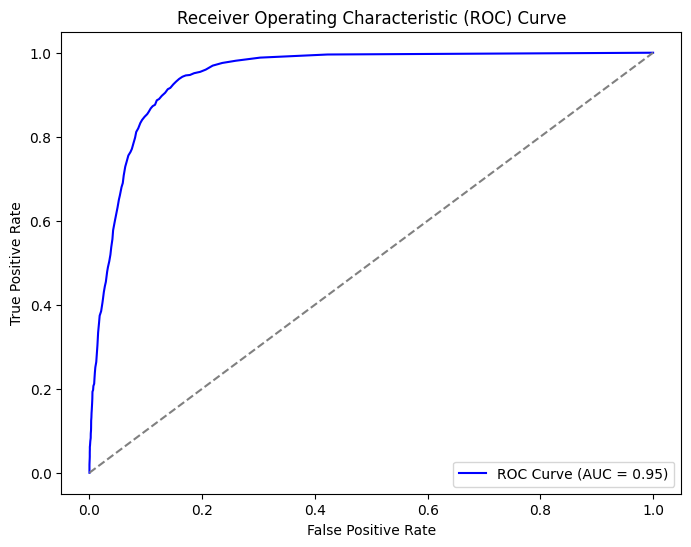

In [50]:

random_forest_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

random_forest_clf.fit(X_train_scaled, y_train)

y_pred = random_forest_clf.predict(X_test_scaled)
y_prob = random_forest_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
